In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

folder_path = '/content/drive/MyDrive/OzoneProject'

# Loading the final dataset

In [2]:
df_final = pd.read_csv(f'BASE_FINAL_3.csv')
df_final.drop('Unnamed: 0',axis= 1,inplace = True)

df_final.describe()

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,GhostColumnAmountO3,SolarZenithAngle,TerrainHeight,TerrainReflectivity,ViewingZenithAngle,Fecha,zona,UV
count,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.332560e+06,3.324200e+06
mean,-3.254520e+01,-5.578873e+01,-2.565177e+29,-2.565146e+29,-2.565146e+29,-2.565146e+29,-2.565146e+29,-2.565146e+29,-5.334632e+00,1.227426e+01,-2.565146e+29,-2.565146e+29,-6.547198e+03,-2.565146e+29,-2.565146e+29,2.014749e+07,1.472727e+01,-2.366383e+29
std,1.443565e+00,1.587212e+00,5.092873e+29,5.092850e+29,5.092850e+29,5.092850e+29,5.092850e+29,5.092850e+29,6.612581e+01,6.146029e+01,5.092850e+29,5.092850e+29,1.320648e+04,5.092850e+29,5.092850e+29,6.023779e+04,8.634929e+00,4.939403e+29
min,-3.492400e+01,-5.841600e+01,-1.267651e+30,-1.267651e+30,-1.267651e+30,-1.267651e+30,-1.267651e+30,-1.267651e+30,-1.280000e+02,-1.280000e+02,-1.267651e+30,-1.267651e+30,-3.276700e+04,-1.267651e+30,-1.267651e+30,2.004100e+07,0.000000e+00,-1.267651e+30
25%,-3.373450e+01,-5.716500e+01,2.505000e+02,3.400000e+00,0.000000e+00,0.000000e+00,2.050000e+02,9.000000e+00,-6.200000e+01,-1.900000e+01,0.000000e+00,2.408700e+01,0.000000e+00,3.000000e-02,1.419900e+01,2.009122e+07,7.000000e+00,1.875309e+00
50%,-3.254500e+01,-5.578900e+01,2.710000e+02,5.100000e+00,9.000000e-02,0.000000e+00,6.280000e+02,2.100000e+01,0.000000e+00,3.000000e+00,5.780000e+00,3.873500e+01,6.500000e+01,3.000000e-02,3.822600e+01,2.015026e+07,1.500000e+01,4.402876e+00
75%,-3.135625e+01,-5.441300e+01,2.907000e+02,7.500000e+00,3.700000e-01,0.000000e+00,8.660000e+02,4.500000e+01,4.800000e+01,6.400000e+01,1.561000e+01,5.370200e+01,1.340000e+02,4.000000e-02,5.497900e+01,2.020053e+07,2.200000e+01,9.241683e+00
max,-3.016700e+01,-5.316200e+01,7.009000e+02,2.047000e+02,1.000000e+00,3.100000e-01,1.013000e+03,2.347000e+03,1.270000e+02,1.270000e+02,1.523100e+02,7.250500e+01,4.560000e+02,1.800000e-01,7.031100e+01,2.025080e+07,2.900000e+01,1.505964e+01


# Pre-Procesado

In [3]:
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'], format = '%Y%m%d')
df_final['DayOfYear'] = df_final['Fecha'].dt.dayofyear
df_final['Año'] = df_final['Fecha'].dt.year
df_final = df_final[(df_final['Año'] >= 2005) & (df_final['Año'] <= 2024)]

In [4]:
df_final.loc[df_final['ColumnAmountO3'] < 100, 'ColumnAmountO3'] = np.nan
df_final.loc[df_final['UV'] < 0, 'UV'] = np.nan
df_final.dropna(subset=['ColumnAmountO3','UV'], inplace=True)

In [5]:
df_final['ColumnAmountO3&Precision'] = df_final['ColumnAmountO3'] + df_final['ColumnAmountO3Precision']

In [6]:
df_final.describe()

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,SolarZenithAngle,TerrainHeight,TerrainReflectivity,ViewingZenithAngle,Fecha,zona,UV,DayOfYear,Año,ColumnAmountO3&Precision
count,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,...,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2472947,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06,2.472947e+06
mean,-3.255228e+01,-5.579976e+01,2.804717e+02,7.322133e+00,3.222096e-01,5.998915e-05,7.061450e+02,4.259995e+01,-6.905427e+00,1.582264e+01,...,4.439042e+01,1.045847e+02,3.563085e-02,4.351821e+01,2014-07-11 19:47:24.458373632,1.475526e+01,6.636842e+00,1.824198e+02,2.014029e+03,2.877938e+02
min,-3.492400e+01,-5.841600e+01,1.006000e+02,1.300000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,-1.280000e+02,-1.280000e+02,...,1.613200e+01,0.000000e+00,1.000000e-02,6.280000e-01,2005-01-01 00:00:00,0.000000e+00,2.638866e-01,1.000000e+00,2.005000e+03,1.238000e+02
25%,-3.392200e+01,-5.716500e+01,2.639000e+02,4.500000e+00,6.000000e-02,0.000000e+00,5.280000e+02,1.500000e+01,-6.200000e+01,-4.100000e+01,...,3.377100e+01,4.200000e+01,3.000000e-02,3.285400e+01,2009-01-30 00:00:00,7.000000e+00,3.185434e+00,9.100000e+01,2.009000e+03,2.705000e+02
50%,-3.267000e+01,-5.591400e+01,2.774000e+02,5.800000e+00,1.700000e-01,0.000000e+00,7.460000e+02,2.800000e+01,-3.600000e+01,4.400000e+01,...,4.443600e+01,9.500000e+01,3.000000e-02,4.666600e+01,2014-06-05 00:00:00,1.500000e+01,5.953547e+00,1.820000e+02,2.014000e+03,2.844000e+02
75%,-3.141900e+01,-5.441300e+01,2.947000e+02,8.100000e+00,5.300000e-01,0.000000e+00,9.210000e+02,5.100000e+01,6.600000e+01,6.500000e+01,...,5.619400e+01,1.490000e+02,4.000000e-02,5.668100e+01,2019-08-19 00:00:00,2.200000e+01,1.013882e+01,2.740000e+02,2.019000e+03,3.021000e+02
max,-3.016700e+01,-5.316200e+01,7.009000e+02,1.231000e+02,1.000000e+00,2.100000e-01,1.013000e+03,2.274000e+03,1.270000e+02,1.270000e+02,...,7.077700e+01,4.560000e+02,1.800000e-01,7.031100e+01,2024-12-31 00:00:00,2.900000e+01,1.505964e+01,3.660000e+02,2.024000e+03,7.859000e+02
std,1.446158e+00,1.587668e+00,2.315068e+01,5.376162e+00,3.353011e-01,9.280739e-04,2.442525e+02,4.985968e+01,7.357646e+01,6.818474e+01,...,1.304615e+01,8.082277e+01,8.532691e-03,1.622984e+01,NaN,8.647319e+00,3.836375e+00,1.055270e+02,5.882245e+00,2.383338e+01


## Agregando predicciones de UV

In [7]:
modelo_promedio = pd.read_excel('predicciones_uv_cielo_promedio.xlsx')
modelo_descubierto = pd.read_excel('predicciones_uv_cielo_descubierto.xlsx')

In [8]:
df_final = pd.merge(df_final, modelo_promedio, on=['DayOfYear','zona'], how='left').rename(columns={'value': 'UV_PRED_PROM', 'UV': 'UV_REAL'})
df_final = pd.merge(df_final, modelo_descubierto, on=['DayOfYear','zona'], how='left').rename(columns={'value': 'UV_PRED_DESC'})

df_final.head()

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,TerrainReflectivity,ViewingZenithAngle,Fecha,zona,UV_REAL,DayOfYear,Año,ColumnAmountO3&Precision,UV_PRED_PROM,UV_PRED_DESC
0,-34.924,-58.416,269.000000,6.2,0.04,0.0,754.0,20.0,-16.0,-103.0,...,0.05,38.227001,2005-01-01,24,12.398545,1,2005,275.200000,11.099691,11.977856
1,-34.924,-58.165,253.600006,5.5,0.04,0.0,914.0,31.0,-16.0,-124.0,...,0.04,35.966999,2005-01-01,24,12.398545,1,2005,259.100006,11.099691,11.977856
2,-34.924,-57.915,265.700012,5.4,0.06,0.0,844.0,38.0,94.0,26.0,...,0.04,33.729000,2005-01-01,25,12.662691,1,2005,271.100012,11.186313,11.788147
3,-34.924,-57.665,265.700012,5.4,0.06,0.0,844.0,38.0,94.0,26.0,...,0.04,33.729000,2005-01-01,25,12.662691,1,2005,271.100012,11.186313,11.788147
4,-34.924,-57.415,264.399994,6.5,0.07,0.0,929.0,67.0,-62.0,65.0,...,0.04,31.509001,2005-01-01,25,12.662691,1,2005,270.899994,11.186313,11.788147


## Agregando predicciones de Ozono

In [9]:
day_of_year = pd.read_excel('linear_regression_model_ozono.xlsx')

In [10]:
day_of_year

,DayOfYear,Prediction
0,1,270.907485
1,2,270.933614
2,3,270.950979
3,4,270.959919
4,5,270.960769
...,...,...
361,362,275.376171
362,363,274.782098
363,364,274.189719
364,365,273.599315


In [11]:
df_final = pd.merge(df_final, day_of_year, on='DayOfYear', how='left').rename(columns={'Prediction': 'OZONO_PRED'})

# Análisis data relacionada a micro-agujeros

In [12]:
df_final_analisis = df_final.copy()

In [13]:
len_data = len(df_final_analisis)
q_micro = len(df_final_analisis[df_final_analisis['ColumnAmountO3'] < 220])
q_micro_conf = len(df_final_analisis[df_final_analisis['ColumnAmountO3&Precision'] < 220])

print('Data total: ', len_data)
print('Microagujeros: ', q_micro)
print('Porcentaje de microagujeros: ', q_micro / len_data * 100)
print('Microagujeros confirmados: ', q_micro_conf)

Data total:  2472947
Microagujeros:  4907
Porcentaje de microagujeros:  0.19842722063998947
Microagujeros confirmados:  933


# Hypothesis test UV_DIF

## Calculando Ozono Crítico

In [14]:
df_final['UV_DIF_PROM'] = df_final['UV_REAL'] - df_final['UV_PRED_PROM']
df_final['UV_DIF_DESC'] = df_final['UV_REAL'] - df_final['UV_PRED_DESC']
df_final['Critical'] = df_final['ColumnAmountO3'] < 220

df_final.head()

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,UV_REAL,DayOfYear,Año,ColumnAmountO3&Precision,UV_PRED_PROM,UV_PRED_DESC,OZONO_PRED,UV_DIF_PROM,UV_DIF_DESC,Critical
0,-34.924,-58.416,269.000000,6.2,0.04,0.0,754.0,20.0,-16.0,-103.0,...,12.398545,1,2005,275.200000,11.099691,11.977856,270.907485,1.298855,0.420690,False
1,-34.924,-58.165,253.600006,5.5,0.04,0.0,914.0,31.0,-16.0,-124.0,...,12.398545,1,2005,259.100006,11.099691,11.977856,270.907485,1.298855,0.420690,False
2,-34.924,-57.915,265.700012,5.4,0.06,0.0,844.0,38.0,94.0,26.0,...,12.662691,1,2005,271.100012,11.186313,11.788147,270.907485,1.476378,0.874544,False
3,-34.924,-57.665,265.700012,5.4,0.06,0.0,844.0,38.0,94.0,26.0,...,12.662691,1,2005,271.100012,11.186313,11.788147,270.907485,1.476378,0.874544,False
4,-34.924,-57.415,264.399994,6.5,0.07,0.0,929.0,67.0,-62.0,65.0,...,12.662691,1,2005,270.899994,11.186313,11.788147,270.907485,1.476378,0.874544,False


Diferencias entre el UV real y la predicción en valores de ozono críticos vs no críticos

In [15]:
df_final.groupby('Critical').describe()['UV_DIF_PROM']['mean']

Critical
False    0.002833
True     0.949161
Name: mean, dtype: float64

In [16]:
df_final.groupby('Critical').describe()['UV_DIF_DESC']['mean']

Critical
False   -1.126124
True    -0.166671
Name: mean, dtype: float64

## Planteo hipótesis

($H_0$): $UV_{DIF\_CR}$ $\le$ $UV_{DIF\_NCR}$<br>
($H_1$): $UV_{DIF\_CR}$ $>$ $UV_{DIF\_NCR}$

## Test con UV_DIF_PROM

In [17]:
# Creo dataset sin duplicados
df_test = df_final[['UV_DIF_PROM','Critical']].drop_duplicates()

# Suppose your dataframe is called df
group_critical = df_test[df_test['Critical'] == True]['UV_DIF_PROM']
group_non_critical = df_test[df_test['Critical'] == False]['UV_DIF_PROM']

# Perform a one-sided (greater) t-test
t_stat, p_value = ttest_ind(group_critical, group_non_critical, equal_var=False, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: UV_DIF_PROM is significantly greater when Critical is True.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that UV_DIF_PROM is greater when Critical is True.")

T-statistic: 38.7994465782243
P-value: 7.993433306195418e-274
Reject the null hypothesis: UV_DIF_PROM is significantly greater when Critical is True.


## Test con UV_DIF_DESC

## Gráfico

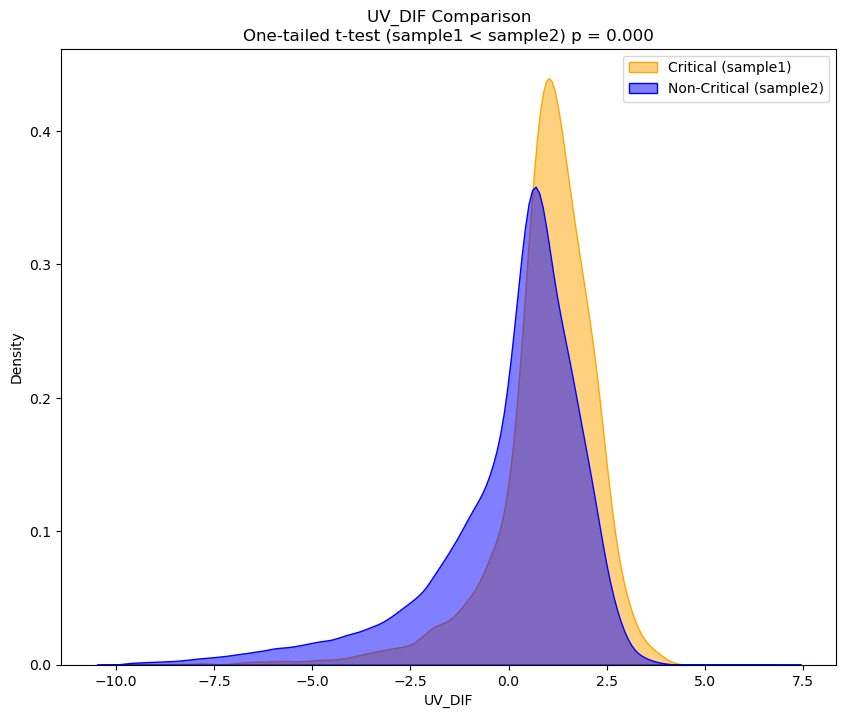

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.kdeplot(group_critical, fill=True, label='Critical (sample1)', color='orange', alpha=0.5)
sns.kdeplot(group_non_critical, fill=True, label='Non-Critical (sample2)', color='blue', alpha=0.5)

plt.title(f'UV_DIF Comparison\nOne-tailed t-test (sample1 < sample2) p = {p_value:.3f}')
plt.xlabel('UV_DIF')
plt.ylabel('Density')
plt.legend()
plt.show()


In [19]:
# Creo dataset sin duplicados
df_test = df_final[['UV_DIF_DESC','Critical']].drop_duplicates()

# Suppose your dataframe is called df
group_critical = df_test[df_test['Critical'] == True]['UV_DIF_DESC']
group_non_critical = df_test[df_test['Critical'] == False]['UV_DIF_DESC']

# Perform a one-sided (greater) t-test
t_stat, p_value = ttest_ind(group_critical, group_non_critical, equal_var=False, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: UV_DIF_DESC is significantly greater when Critical is True.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that UV_DIF_DESC is greater when Critical is True.")

T-statistic: 38.77507788591726
P-value: 1.015149919715964e-273
Reject the null hypothesis: UV_DIF_DESC is significantly greater when Critical is True.


# Hypothesis Test UV_REAL dia / zona

Ya demostramos que los valores de UV cuando el ozono es crítico son distintos y mayores. <br>
Entonces los que nos falta ahora es, dado un valor de ozono crítico, decir si el uv refleja esa misma criticalidad, y si lo hace, sabremos entonces que se trata de un valor de ozono crítico real. <br>
El problema de esto es que el UV varía según el día del daño, entonces un UV solo se puede definir como crítico en el contexto de su día.

Para eso crearemos una distribución diaria del UV y dado el uv para un valor crítico de ozono, obtener la probabilidad de que ese uv sea o no crítico

In [20]:
df_final_h2 = df_final.copy()
df_final_mod_uv = df_final[['zona','DayOfYear','UV_REAL','Critical']].drop_duplicates().copy()

Ejemplo con una sola zona

In [21]:
df_final_mod_uv

,zona,DayOfYear,UV_REAL,Critical
0,24,1,12.398545,False
2,25,1,12.662691,False
6,26,1,13.030831,False
10,27,1,13.416982,False
14,28,1,13.362470,False
...,...,...,...,...
2472861,1,366,13.527755,False
2472865,2,366,13.466759,False
2472869,3,366,13.536504,False
2472873,4,366,13.136055,False


In [22]:
ejemplo = df_final_mod_uv[df_final_mod_uv['Critical'] == True].loc[907]
ejemplo

zona                25
DayOfYear            3
UV_REAL      11.840443
Critical          True
Name: 907, dtype: object

In [23]:
df_final_mod_uv_17 = df_final_mod_uv[(df_final_mod_uv['zona'] == 25) & (df_final_mod_uv['Critical'] == False)].copy()
df_final_mod_uv_17 = df_final_mod_uv_17.groupby('DayOfYear')['UV_REAL']
historical_uv = df_final_mod_uv_17.get_group(3)

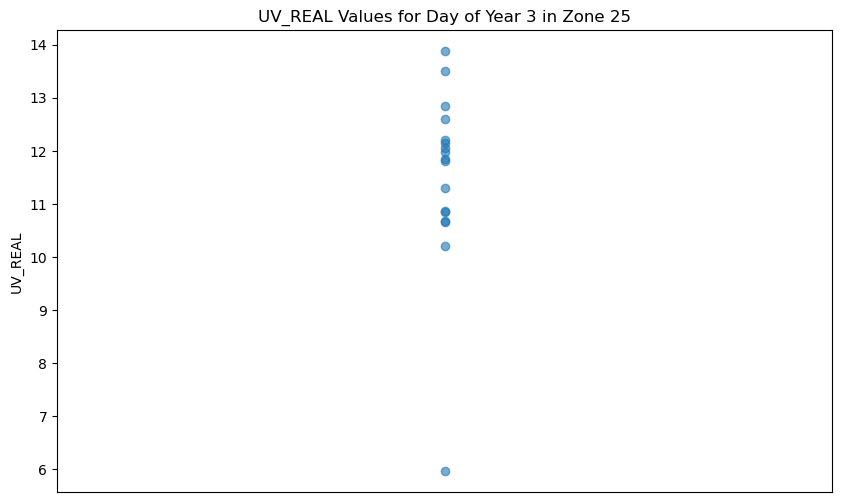

In [24]:
plt.figure(figsize=(10, 6))

# Create a list of y-values from the 'historical_uv' series for the stripplot
y_values = historical_uv.tolist()
# Create a list of x-values, all set to 0, to make points appear on a vertical line
x_values = [0] * len(y_values)

# Use scatter plot to place all points at x=0
plt.scatter(x_values, y_values, alpha=0.6)

plt.title('UV_REAL Values for Day of Year 3 in Zone 25')
plt.ylabel('UV_REAL')
plt.xlabel('') # Remove x-axis label
plt.xticks([]) # Hide x-axis ticks
plt.xlim([-0.1, 0.1]) # Set narrow limits to keep points close to the center vertical line

plt.show()


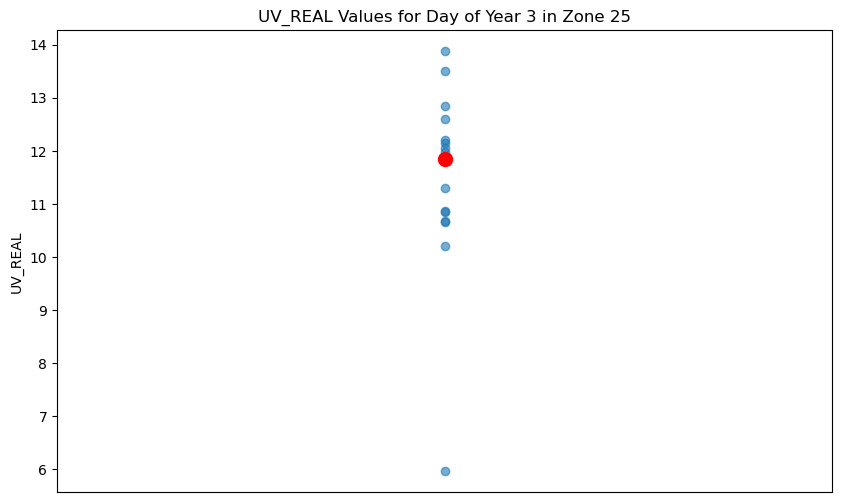

In [25]:
plt.figure(figsize=(10, 6))

# Create a list of y-values from the 'historical_uv' series for the stripplot
y_values = historical_uv.tolist()
# Create a list of x-values, all set to 0, to make points appear on a vertical line
x_values = [0] * len(y_values)

# Use scatter plot to place all points at x=0
plt.scatter(x_values, y_values, alpha=0.6)

# Add the red dot for the example value
plt.scatter(0, ejemplo['UV_REAL'], color='red', s=100, zorder=5)

plt.title('UV_REAL Values for Day of Year 3 in Zone 25')
plt.ylabel('UV_REAL')
plt.xlabel('') # Remove x-axis label
plt.xticks([]) # Hide x-axis ticks
plt.xlim([-0.1, 0.1]) # Set narrow limits to keep points close to the center vertical line

plt.show()


Z-score: 0.20
One-sided p-value (greater than): 0.4206


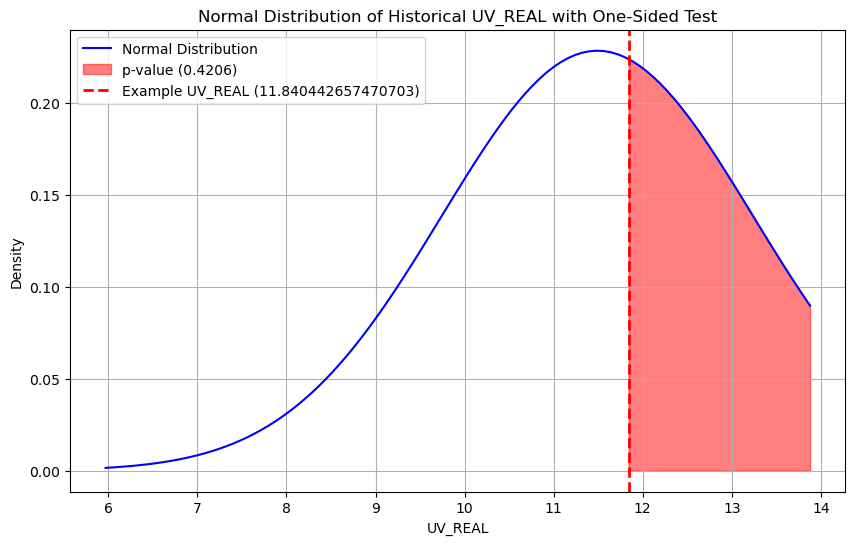

In [26]:
# Calculate mean and standard deviation for the distribution
mean_uv = historical_uv.mean()
std_uv = historical_uv.std()

# Calculate the z-score for the example UV value
z_score = (ejemplo['UV_REAL'] - mean_uv) / std_uv

# Calculate the p-value for a one-sided test (greater than)
p_value_one_sided = 1 - stats.norm.cdf(z_score)

print(f"Z-score: {z_score:.2f}")
print(f"One-sided p-value (greater than): {p_value_one_sided:.4f}")

# Generate values for the normal distribution curve
x = np.linspace(historical_uv.min(), historical_uv.max(), 100)
y = stats.norm.pdf(x, mean_uv, std_uv)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')

# Shade the area representing the one-sided p-value (greaater than)
# We need to find the x-value corresponding to the example's UV_REAL
x_shade = np.linspace(ejemplo['UV_REAL'], historical_uv.max(), 100)
y_shade = stats.norm.pdf(x_shade, mean_uv, std_uv)
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5, label=f'p-value ({p_value_one_sided:.4f})')

# Mark the position of the example UV value
plt.axvline(ejemplo['UV_REAL'], color='red', linestyle='dashed', linewidth=2, label=f'Example UV_REAL ({ejemplo["UV_REAL"]})')

plt.title('Normal Distribution of Historical UV_REAL with One-Sided Test')
plt.xlabel('UV_REAL')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Verifico ahora mis valores de Ozono:

In [27]:
df_final_h2[(df_final_h2['DayOfYear'] == 3) & (df_final_h2['zona'] == 25) & (df_final_h2['Critical'] == True)][['ColumnAmountO3']].loc[907]

ColumnAmountO3    215.5
Name: 907, dtype: float64

## Asumpción de normalidad

In [28]:
from scipy.stats import shapiro
from scipy.stats import normaltest


stat, p = normaltest(historical_uv)
print(f"D'Agostino and Pearson p-value: {p:.4f}")

stat, p = shapiro(historical_uv)
print(f"Shapiro-Wilk p-value: {p:.4f}")

D'Agostino and Pearson p-value: 0.0001
Shapiro-Wilk p-value: 0.0048


C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


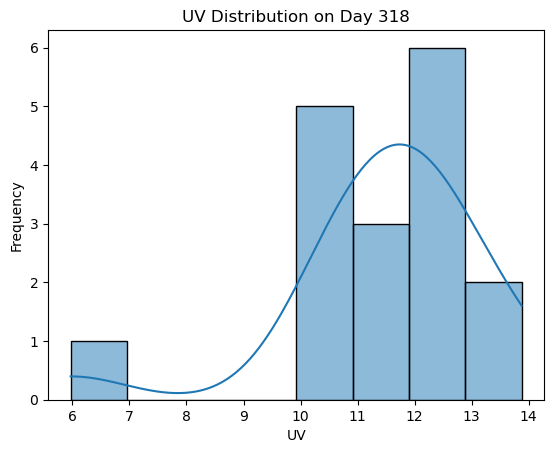

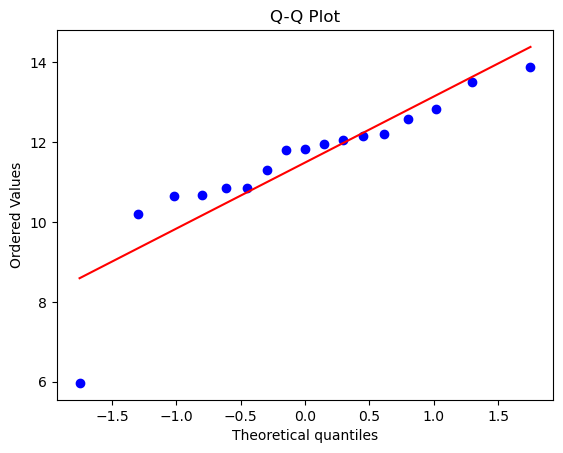

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.histplot(historical_uv, kde=True)
plt.title('UV Distribution on Day 318')
plt.xlabel("UV")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
stats.probplot(historical_uv, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [30]:
df_final_mod_uv_17 = df_final_mod_uv[(df_final_mod_uv['zona'].isin([12,13,14,15,16,17])) & (df_final_mod_uv['Critical'] == False)].copy()
df_final_mod_uv_17 = df_final_mod_uv_17.groupby('DayOfYear')['UV_REAL']
historical_uv = df_final_mod_uv_17.get_group(318)

In [31]:
stat, p = normaltest(historical_uv)
print(f"D'Agostino and Pearson p-value: {p:.4f}")

stat, p = shapiro(historical_uv)
print(f"Shapiro-Wilk p-value: {p:.4f}")

D'Agostino and Pearson p-value: 0.0002
Shapiro-Wilk p-value: 0.0000


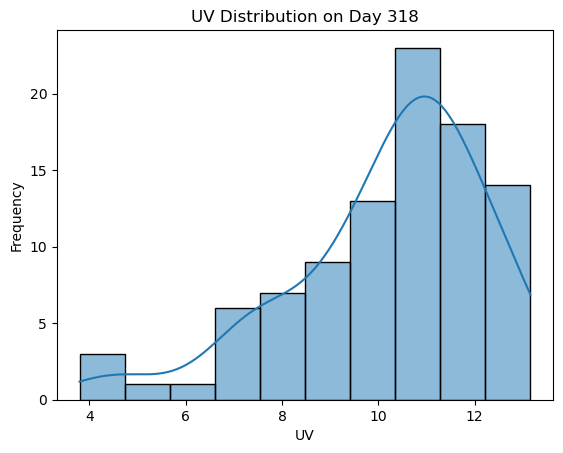

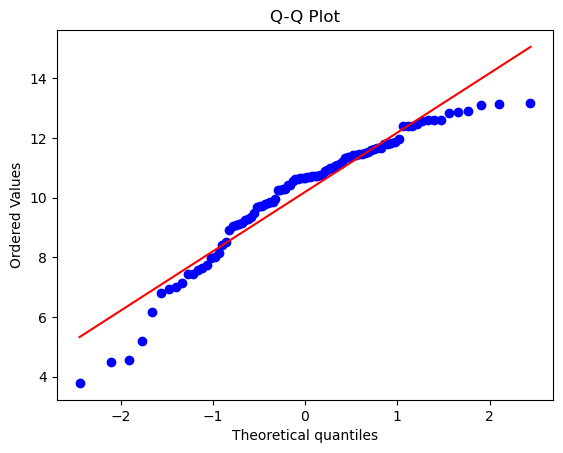

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.histplot(historical_uv, kde=True)
plt.title('UV Distribution on Day 318')
plt.xlabel("UV")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
stats.probplot(historical_uv, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Dado esto, no podemos asumir normalidad, esto se debe a que los valores de ozono tiene una cola inferior mas pronunciada

## Test no parametrico

In [33]:
def empirical_p_greater(new_value, historical_values):
    historical_values = np.array(historical_values)
    count = np.sum(historical_values >= new_value)
    p = count / len(historical_values)
    return p

In [34]:
df_final_mod_uv_17 = df_final_mod_uv[(df_final_mod_uv['zona'].isin([12,13,14,15,16,17])) & (df_final_mod_uv['Critical'] == False)].copy()
df_final_mod_uv_17 = df_final_mod_uv_17.groupby('DayOfYear')['UV_REAL']
historical_uv = df_final_mod_uv_17.get_group(318)

In [35]:
p_value = empirical_p_greater(ejemplo['UV_REAL'], historical_uv)
print(f"Empirical one-sided p-value (greater): {p_value:.4f}")

# Optional threshold
alpha = 0.05
if p_value < alpha:
    print("New value is significantly higher than historical values (reject H₀)")
else:
    print("New value is not significantly higher (fail to reject H₀)")

Empirical one-sided p-value (greater): 0.1684
New value is not significantly higher (fail to reject H₀)


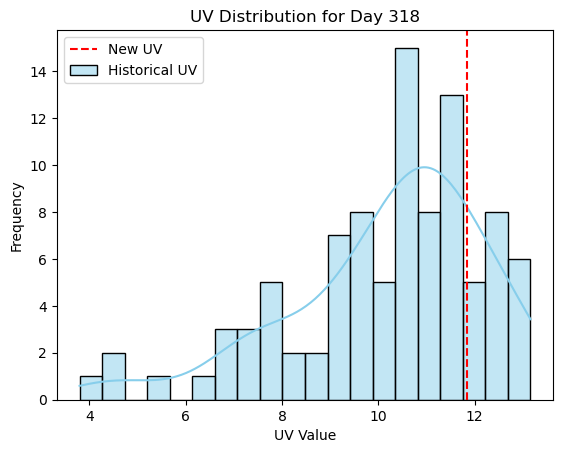

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(historical_uv, bins=20, kde=True, color='skyblue', label='Historical UV')
plt.axvline(ejemplo['UV_REAL'], color='red', linestyle='--', label='New UV')
plt.legend()
plt.title(f'UV Distribution for Day 318')
plt.xlabel("UV Value")
plt.ylabel("Frequency")
plt.show()

## Generalización

Generalizamos el test que hicimos previamente pero ahora para todo nuestro dataset

In [37]:
df_final_mod_uv['P_VAL'] = np.nan


for index, row in df_final_mod_uv[df_final_mod_uv['Critical'] == True].iterrows():
  df_final_mod_uv_gp = df_final_mod_uv[(df_final_mod_uv['zona'] == row['zona']) & (df_final_mod_uv['Critical'] == False)].groupby('DayOfYear')['UV_REAL']
  historical_uv = df_final_mod_uv_gp.get_group(row['DayOfYear'])

  p_value = empirical_p_greater(row['UV_REAL'], historical_uv)

  df_final_mod_uv.loc[index,'P_VAL'] = p_value

In [38]:
df_final_mod_uv[(df_final_mod_uv['Critical'] == True) & (df_final_mod_uv['P_VAL'] <= 0.05)]

,zona,DayOfYear,UV_REAL,Critical,P_VAL


La distribución por día y zona no encontro ningún valor crítivo relevante, pero este es obvio porque no contamos con tantos data points en una zona para llegar a una distribución empírica que permita este número. <br>
Para solucionar este problema voy a usar zonas agrupadas por su latitud como sugirio Graciela

# Hypothesis Test UV_REAL día

## Modelado de zona a país

In [39]:
# Creamos copia del dataset
df_final_mod_uv_2 = df_final[['zona','DayOfYear','UV_REAL','Critical','Fecha']].drop_duplicates().copy()

In [40]:
# Agrupo por latitud
df_final_mod_uv_2['zona_agrupada'] = (df_final_mod_uv_2['zona'] // 6) + 1
df_final_mod_uv_2['zona_agrupada'] = df_final_mod_uv_2['zona_agrupada'].clip(upper=5)

In [41]:
df_final_mod_uv_2['P_VAL'] = np.nan

for index, row in df_final_mod_uv_2[df_final_mod_uv_2['Critical'] == True].iterrows():
  df_final_mod_uv_2_gp = df_final_mod_uv_2[(df_final_mod_uv_2['zona_agrupada'] == row['zona_agrupada']) & (df_final_mod_uv_2['Critical'] == False)].groupby('DayOfYear')['UV_REAL']
  historical_uv = df_final_mod_uv_2_gp.get_group(row['DayOfYear'])

  p_value = empirical_p_greater(row['UV_REAL'], historical_uv)

  df_final_mod_uv_2.loc[index,'P_VAL'] = p_value

In [42]:
df_final_mod_uv_2[(df_final_mod_uv_2['Critical'] == True) & (df_final_mod_uv_2['P_VAL'] <= 0.05)]

,zona,DayOfYear,UV_REAL,Critical,Fecha,zona_agrupada,P_VAL
7121,28,17,13.563406,True,2005-01-17,5,0.019802
7341,10,17,14.158422,True,2005-01-17,2,0.028846
9062,17,22,14.074268,True,2005-01-22,3,0.030000
10792,15,26,13.359708,True,2005-01-26,3,0.021277
10975,5,26,14.032291,True,2005-01-26,1,0.010638
...,...,...,...,...,...,...,...
2410552,15,159,3.506934,True,2024-06-07,3,0.010309
2410602,9,159,3.747223,True,2024-06-07,2,0.010309
2410635,3,159,3.910795,True,2024-06-07,1,0.041667
2410675,4,159,3.943438,True,2024-06-07,1,0.010417


## Visualización gráfica

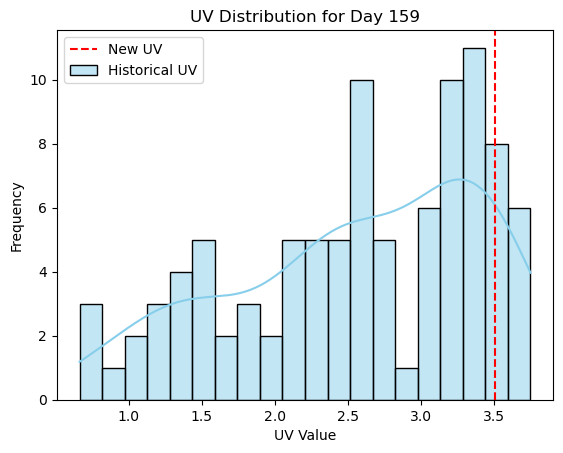

In [43]:
zona_agrupada = 2
dia = 159

#uv_critico = df_final_mod_uv_2[(df_final_mod_uv_2['zona_agrupada'] == zona_agrupada) & (df_final_mod_uv_2['Critical'] == True) & (df_final_mod_uv_2['DayOfYear'] == dia) & (df_final_mod_uv_2['P_VAL'] <= 0.05)]['UV_REAL'].values
uv_critico = df_final_mod_uv_2.loc[2410552]['UV_REAL']
df_temp = df_final_mod_uv_2[(df_final_mod_uv_2['zona_agrupada'] == zona_agrupada) & (df_final_mod_uv_2['Critical'] == False)].groupby('DayOfYear')['UV_REAL']
historical_uv = df_temp.get_group(dia)

sns.histplot(historical_uv, bins=20, kde=True, color='skyblue', label='Historical UV')
plt.axvline(uv_critico, color='red', linestyle='--', label='New UV')
plt.legend()
plt.title(f'UV Distribution for Day {dia}')
plt.xlabel("UV Value")
plt.ylabel("Frequency")
plt.show()

## Estadísticas

In [44]:
total_valores_criticos = len(df_final_mod_uv_2[df_final_mod_uv_2['Critical'] == True])
valores_criticos_reales = len(df_final_mod_uv_2[(df_final_mod_uv_2['Critical'] == True) & (df_final_mod_uv_2['P_VAL'] <= 0.05)])

print('Total valores críticos: ', total_valores_criticos)
print('Total valores críticos reales: ', valores_criticos_reales)
print('Porcentaje valores críticos reales: ', valores_criticos_reales / total_valores_criticos * 100)

Total valores críticos:  3189
Total valores críticos reales:  528
Porcentaje valores críticos reales:  16.55691439322672


Vuelvo a realizar el mismo loop para calcular P-value empírico pero esta vez a todos los puntos

In [45]:
#Comentado porque demora mucho en correr
df_final_mod_uv_2_copy = df_final_mod_uv_2.copy()
df_final_mod_uv_2_copy['P_VAL'] = np.nan

for index, row in df_final_mod_uv_2_copy.iterrows():
  df_final_mod_uv_2_copy_gp = df_final_mod_uv_2_copy[(df_final_mod_uv_2_copy['zona_agrupada'] == row['zona_agrupada'])].groupby('DayOfYear')['UV_REAL']
  historical_uv = df_final_mod_uv_2_copy_gp.get_group(row['DayOfYear'])

  p_value = empirical_p_greater(row['UV_REAL'], historical_uv)

  df_final_mod_uv_2_copy.loc[index,'P_VAL'] = p_value

In [46]:
print(len(df_final_mod_uv_2_copy[df_final_mod_uv_2_copy['P_VAL'] <= 0.05]))
print(len(df_final_mod_uv_2_copy[(df_final_mod_uv_2['Critical'] == True) & (df_final_mod_uv_2_copy['P_VAL'] <= 0.05)]))

8003
390


In [47]:
len(df_final_mod_uv_2[df_final_mod_uv_2['Critical'] == False])

176499

Si bien pareciera que se pueden ver más valores no críticos como de mayor P-value, esto en realidad no dice nada, porque como estamos uando una distribución empírica basada en nuestra data, por lo menos un valor por día por zona va a ser de p-value alto <br>
Mi idea para mermar esto es recurrir al modelo que usamos previamente

In [48]:
# Creos los objetivos que salen del test anterior
targets = df_final_mod_uv_2_copy[(df_final_mod_uv_2['Critical'] == True) & (df_final_mod_uv_2_copy['P_VAL'] <= 0.05)][['Fecha','zona']]
targets['Target'] = 1

In [49]:
df_final = pd.merge(df_final, targets, on=['Fecha','zona'], how='left')
df_final['Target'] = df_final['Target'].fillna(0)

# Probabilidad de micro-agujero

Predecir probabilidad de crítico según ambos modelos

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler

## Modelo 0 (con valores críticos del test como base)

### Pre-Procesamiento

In [51]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']

target = 'Target'

# Drop na
df_modelo_0 = df_final.copy()

df_modelo_0[target] = df_modelo_0[target].astype(int)

df_modelo_0.dropna(subset=features + [target], inplace=True)

# Mask Target
df_modelo_0[target] = df_modelo_0[target].astype(int)

# Normalize features
for feature in features:
  df_modelo_0[feature + '_NORMALIZED'] = (df_modelo_0[feature] - df_modelo_0[feature].min()) / (df_modelo_0[feature].max() - df_modelo_0[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_modelo_0['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_modelo_0['zona'], prefix='zona')
df_modelo_0 = pd.concat([df_modelo_0, dummies], axis=1)

X = df_modelo_0[features_normalized + features_dummy_zones]
y = df_modelo_0[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 Target
0    1973736
1       4621
Name: count, dtype: int64

Resampled training set class distribution:
 Target
0    1973736
1    1973736
Name: count, dtype: int64


### Entrenamiento

In [52]:
# Modelo balanceado
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validacion

In [53]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[447737  45698]
 [    67   1088]]

ROC AUC Score: 0.973599117451094

Balanced Accuracy Score: 0.9246896732452075

Precision: 0.02325481981789424
Recall: 0.941991341991342
F1 Score: 0.04538912413174527
Accuracy: 0.9074688125518106


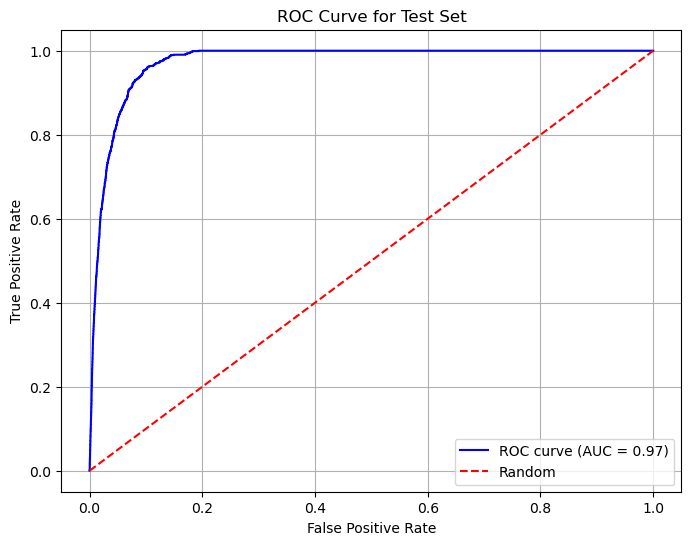

In [54]:
# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
model.coef_[0]

array([ 10.70348489,  -3.89184916,  -0.1422562 ,   0.16052474,
         3.37264477,  43.05492634, -21.89848725, -19.8630143 ,
        -4.98118693,  30.93621001,  25.6363905 ,  -1.26832219,
        -1.97477946,  -0.1543506 ,  -1.35380945,  -1.83600611,
        -1.28371796,  -1.6353282 ,  -0.88090761,  -0.08508658,
        -0.75447271,  -0.93969564,  -1.00278772,  -1.56508299,
        -1.06709025,  -1.5984215 ,  -0.85850254,  -1.59479864,
        -1.44227326,  -1.36009306,  -2.4291949 ,  -1.11732698,
        -0.47972913,  -1.45882624,  -1.79094624,  -1.76179349,
        -2.07602096,  -0.66377119,  -0.82643642,  -1.01140064,
        -2.56025544])

In [56]:
# Show the weights (coefficients) for the features
print("\nModel Coefficients (Weights):")
for feature, weight in zip(features + features_dummy_zones, model.coef_[0]):
    print(f"{feature}: {weight:.4f}")

# Show the intercept (bias)
print(f"\nModel Intercept (Bias): {model.intercept_[0]:.4f}")


Model Coefficients (Weights):
ColumnAmountO3Precision: 10.7035
CloudFraction: -3.8918
CloudFractionPrecision: -0.1423
CloudPressure: 0.1605
CloudPressure_Precision: 3.3726
UV_REAL: 43.0549
UV_PRED_PROM: -21.8985
UV_PRED_DESC: -19.8630
OZONO_PRED: -4.9812
UV_DIF_PROM: 30.9362
UV_DIF_DESC: 25.6364
zona_0: -1.2683
zona_1: -1.9748
zona_2: -0.1544
zona_3: -1.3538
zona_4: -1.8360
zona_5: -1.2837
zona_6: -1.6353
zona_7: -0.8809
zona_8: -0.0851
zona_9: -0.7545
zona_10: -0.9397
zona_11: -1.0028
zona_12: -1.5651
zona_13: -1.0671
zona_14: -1.5984
zona_15: -0.8585
zona_16: -1.5948
zona_17: -1.4423
zona_18: -1.3601
zona_19: -2.4292
zona_20: -1.1173
zona_21: -0.4797
zona_22: -1.4588
zona_23: -1.7909
zona_24: -1.7618
zona_25: -2.0760
zona_26: -0.6638
zona_27: -0.8264
zona_28: -1.0114
zona_29: -2.5603

Model Intercept (Bias): -39.1432


### Thresholds

In [57]:
# Treshold twinkering
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)[:, 1])
precision_list = []
recall_list = []

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
    print("\nPrecision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))

    precision_list.append(tp / (tp + fp))
    recall_list.append(tp / (tp + fn))


******** For i = 0.05 ******

Precision: 0.008766470338211185
Recall: 1.0
F1 Score: 0.017380574386601157
Accuracy: 0.7359489678319416

******** For i = 0.1 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.010658422922530338
Recall: 1.0
F1 Score: 0.021092037983929876
Accuracy: 0.7832345983541924

******** For i = 0.15 ******

Precision: 0.012326952657665357
Recall: 0.9991341991341991
F1 Score: 0.024353441453609227
Accuracy: 0.8130512141369619

******** For i = 0.2 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.013770854900450201
Recall: 0.9904761904761905
F1 Score: 0.02716404088853008
Accuracy: 0.834325400837057

******** For i = 0.25 ******

Precision: 0.01532151043551695
Recall: 0.9896103896103896
F1 Score: 0.03017582765721527
Accuracy: 0.8514527184132311

******** For i = 0.3 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.016752843846949327
Recall: 0.9818181818181818
F1 Score: 0.03294356888662939
Accuracy: 0.8653895145474029

******** For i = 0.35 ******

Precision: 0.018228785884875958
Recall: 0.9714285714285714
F1 Score: 0.03578604918189647
Accuracy: 0.8777532906043389

******** For i = 0.4 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.01981343682130523
Recall: 0.9636363636363636
F1 Score: 0.03882851610877566
Accuracy: 0.8885885278715704

******** For i = 0.45 ******

Precision: 0.02155777327303914
Recall: 0.9575757575757575
F1 Score: 0.04216626317695724
Accuracy: 0.8984067611557047

******** For i = 0.5 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.02325481981789424
Recall: 0.941991341991342
F1 Score: 0.04538912413174527
Accuracy: 0.9074688125518106

******** For i = 0.55 ******

Precision: 0.025309905205466564
Recall: 0.9316017316017317
F1 Score: 0.04928093798662636
Accuracy: 0.9160597666754281

******** For i = 0.6 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.027548711011680237
Recall: 0.9168831168831169
F1 Score: 0.053490251540559655
Accuracy: 0.9242241048140885

******** For i = 0.65 ******

Precision: 0.02996525767226404
Recall: 0.8961038961038961
F1 Score: 0.05799131531026754
Accuracy: 0.9320143957621464

******** For i = 0.7 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.032761208640605624
Recall: 0.8692640692640693
F1 Score: 0.06314266846954499
Accuracy: 0.9397622272993793

******** For i = 0.75 ******

Precision: 0.036373769273639237
Recall: 0.8476190476190476
F1 Score: 0.06975418596366227
Accuracy: 0.9472047554540124

******** For i = 0.8 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.04052067116415845
Recall: 0.8112554112554112
F1 Score: 0.07718604555377075
Accuracy: 0.9546998524030005

******** For i = 0.85 ******

Precision: 0.04591516924362725
Recall: 0.7610389610389611
F1 Score: 0.08660525149022119
Accuracy: 0.962512383994824

******** For i = 0.9 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.05429925524712254
Recall: 0.6943722943722944
F1 Score: 0.1007221350078493
Accuracy: 0.9710447036939688

******** For i = 0.95 ******

Precision: 0.0698446705945367
Recall: 0.5645021645021645
F1 Score: 0.12430886558627265
Accuracy: 0.9814270405790655

******** For i = 0.99 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.1066621803499327
Recall: 0.27445887445887446
F1 Score: 0.15362248606736129
Accuracy: 0.9929375846660871


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\1250822055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


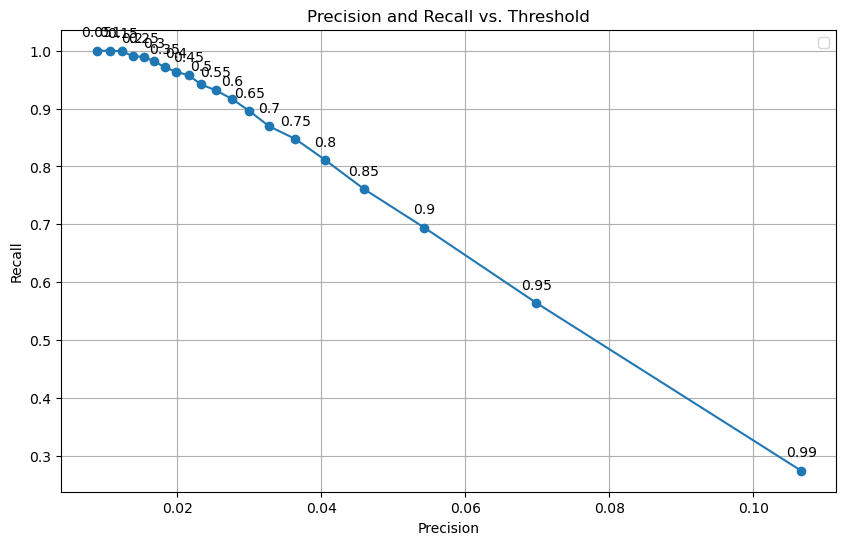

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Annotate every point using threshold_list values
for i, txt in enumerate(threshold_list):
    plt.annotate(f'{txt}', (precision_list[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Agrego columna de probabilidad
df_modelo_0['Probability_Critical'] = model.predict_proba(df_modelo_0[features_normalized + features_dummy_zones])[:, 1]
df_modelo_0['Probability_Critical'] = df_modelo_0['Probability_Critical'].round(4)

### Ejemplo

In [60]:
df_modelo_0[df_modelo_0['Critical'] == True].sort_values('Probability_Critical')

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,zona_21,zona_22,zona_23,zona_24,zona_25,zona_26,zona_27,zona_28,zona_29,Probability_Critical
1461134,-30.918,-55.163,206.699997,44.900002,1.00,0.0,427.0,14.0,-38.0,78.0,...,False,False,False,False,False,False,False,False,False,0.0
1191451,-32.921,-54.163,219.399994,11.700000,0.47,0.0,326.0,19.0,65.0,-61.0,...,False,False,False,False,False,False,False,False,False,0.0
1749460,-33.922,-56.414,219.300003,49.099998,0.44,0.0,706.0,18.0,81.0,82.0,...,False,False,False,False,False,False,False,False,False,0.0
2042616,-33.421,-55.163,219.100006,11.800000,0.67,0.0,829.0,12.0,-77.0,113.0,...,True,False,False,False,False,False,False,False,False,0.0
1191452,-32.921,-53.912,219.399994,11.700000,0.47,0.0,326.0,19.0,65.0,-61.0,...,False,False,False,False,False,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120479,-32.921,-55.413,161.699997,54.599998,0.04,0.0,992.0,38.0,101.0,23.0,...,False,False,False,False,False,False,False,False,False,1.0
120482,-32.921,-54.663,211.500000,24.500000,0.04,0.0,977.0,64.0,-62.0,65.0,...,False,False,False,False,False,False,False,False,False,1.0
120480,-32.921,-55.163,161.699997,54.599998,0.04,0.0,992.0,38.0,101.0,23.0,...,False,False,False,False,False,False,False,False,False,1.0
188035,-34.924,-56.414,205.699997,9.400000,0.07,0.0,1013.0,36.0,-62.0,64.0,...,False,False,False,False,False,True,False,False,False,1.0


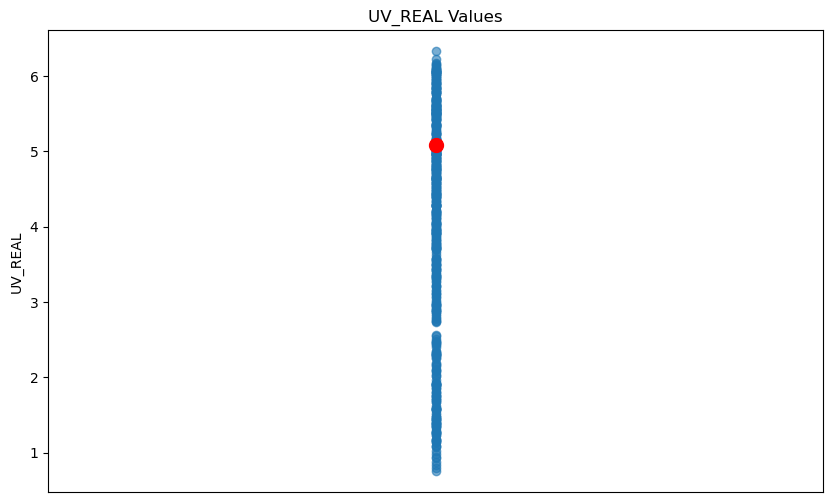

In [61]:
plt.figure(figsize=(10, 6))

# Create a list of y-values from the 'historical_uv' series for the stripplot
y_values = df_modelo_0[(df_modelo_0['DayOfYear'] == 246) & (df_modelo_0['Critical'] == False)][['zona','UV_REAL']].drop_duplicates()['UV_REAL'].tolist()
# Create a list of x-values, all set to 0, to make points appear on a vertical line
x_values = [0] * len(y_values)

# Use scatter plot to place all points at x=0
plt.scatter(x_values, y_values, alpha=0.6)

# Add the red dot for the example value
plt.scatter(0, df_modelo_0.loc[2436827]['UV_REAL'], color='red', s=100, zorder=5)

plt.title('UV_REAL Values')
plt.ylabel('UV_REAL')
plt.xlabel('') # Remove x-axis label
plt.xticks([]) # Hide x-axis ticks
plt.xlim([-0.1, 0.1]) # Set narrow limits to keep points close to the center vertical line

plt.show()

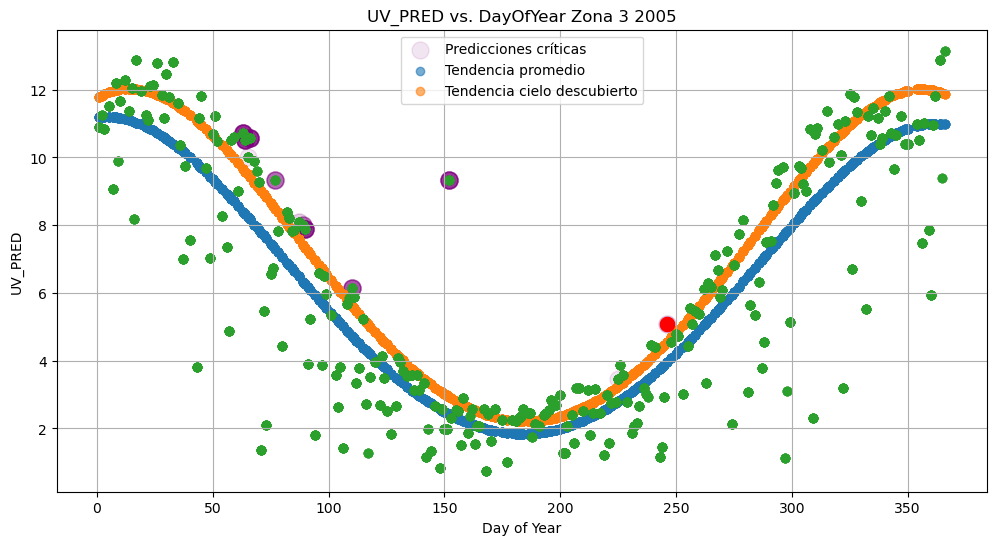

In [62]:
# Subsets
df_zona_26_2005 = df_modelo_0[(df_modelo_0['zona'] == 25) & (df_modelo_0['Fecha'].dt.year == 2024)].copy()
df_zona_26_2005_critical = df_modelo_0[(df_modelo_0['DayOfYear'] == 246) & (df_modelo_0['zona'] == 25) & (df_modelo_0['Fecha'].dt.year == 2024) & (df_modelo_0['Critical'] == True)].copy()
df_zona_clas_critical = df_modelo_0[(df_modelo_0['zona'] == 25) & (df_modelo_0['Fecha'].dt.year == 2024) & (df_modelo_0['Probability_Critical'] >= 0.8)].copy()
df_zona_26 = df_modelo_0[(df_modelo_0['zona'] == 25)].copy()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_zona_clas_critical['DayOfYear'], df_zona_clas_critical['UV_REAL'], color='purple', s=150, alpha=0.1, label = 'Predicciones críticas') # Predicho como crítico
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_PROM'], label = "Tendencia promedio", alpha=0.6) # Linea tendencia promedio
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_DESC'], label = "Tendencia cielo descubierto", alpha=0.6) # Linea tendencia descubierto
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_REAL'], alpha=0.6) # Valores de UV
plt.scatter(df_zona_26_2005_critical['DayOfYear'], df_zona_26_2005_critical['UV_REAL'], color='red', s=100, zorder=5) # Punto Ejemplo
plt.title('UV_PRED vs. DayOfYear Zona 3 2005')
plt.xlabel('Day of Year')
plt.ylabel('UV_PRED')
plt.grid(True)
plt.legend()
plt.show()

## Modelo 1 (Target de ozono crítico, usando Ozono_Precision)

### Pre-procesamiento

In [63]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']
target = 'Critical'

# Drop na
df_final_prob_uv_model = df_final.copy()
df_final_prob_uv_model.dropna(subset=features + [target], inplace=True)

# Mask Target
df_final_prob_uv_model[target] = df_final_prob_uv_model[target].astype(int)

# Normalize features
for feature in features:
  df_final_prob_uv_model[feature + '_NORMALIZED'] = (df_final_prob_uv_model[feature] - df_final_prob_uv_model[feature].min()) / (df_final_prob_uv_model[feature].max() - df_final_prob_uv_model[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_final_prob_uv_model['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_final_prob_uv_model['zona'], prefix='zona')
df_final_prob_uv_model = pd.concat([df_final_prob_uv_model, dummies], axis=1)

X = df_final_prob_uv_model[features_normalized + features_dummy_zones]
y = df_final_prob_uv_model[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 Critical
0    1974431
1       3926
Name: count, dtype: int64

Resampled training set class distribution:
 Critical
0    1974431
1    1974431
Name: count, dtype: int64


### Entrenamiento

In [64]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [65]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[463177  30432]
 [   107    874]]

ROC AUC Score: 0.9662336399763924

Balanced Accuracy Score: 0.9146377942721151

Precision: 0.027917970995975212
Recall: 0.890927624872579
F1 Score: 0.05413943692507821
Accuracy: 0.9382539072767343


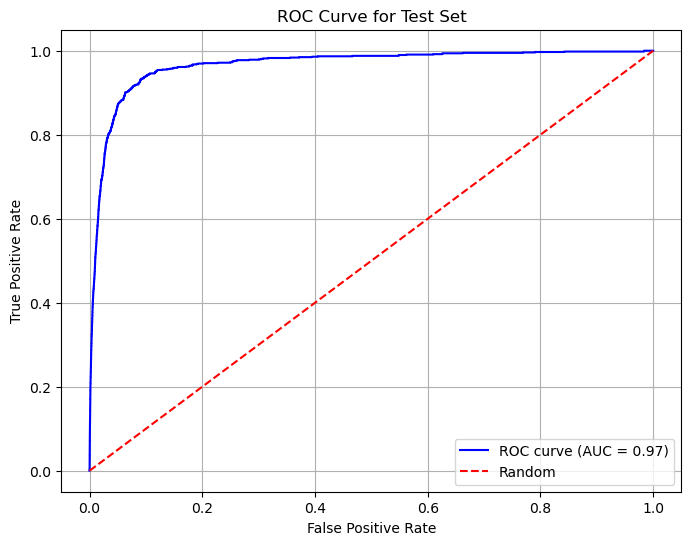

In [66]:
# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Show the weights (coefficients) for the features
print("\nModel Coefficients (Weights):")
for feature, weight in zip(features + features_dummy_zones, model.coef_[0]):
    print(f"{feature}: {weight:.4f}")

# Show the intercept (bias)
print(f"\nModel Intercept (Bias): {model.intercept_[0]:.4f}")


Model Coefficients (Weights):
ColumnAmountO3Precision: 37.7044
CloudFraction: 1.9901
CloudFractionPrecision: 0.1263
CloudPressure: 1.4004
CloudPressure_Precision: -0.0754
UV_REAL: 5.9605
UV_PRED_PROM: -3.7257
UV_PRED_DESC: -3.3101
OZONO_PRED: -3.6586
UV_DIF_PROM: 3.6111
UV_DIF_DESC: 2.7191
zona_0: 0.0178
zona_1: 0.1214
zona_2: 0.0499
zona_3: 0.2118
zona_4: -0.4097
zona_5: -0.1084
zona_6: 0.5615
zona_7: 0.1751
zona_8: 0.0901
zona_9: 0.2944
zona_10: -0.0296
zona_11: -0.2961
zona_12: 0.3320
zona_13: -0.4057
zona_14: -0.4975
zona_15: -0.0833
zona_16: 0.0265
zona_17: -0.7173
zona_18: -0.6030
zona_19: -0.5908
zona_20: -0.4179
zona_21: -0.3159
zona_22: -0.2820
zona_23: -0.8725
zona_24: -0.4769
zona_25: -0.5886
zona_26: -0.5184
zona_27: -0.4114
zona_28: -0.8542
zona_29: -0.9180

Model Intercept (Bias): -7.5239


In [68]:
# Agrego columna de probabilidad
df_final_prob_uv_model['Probability_Critical'] = model.predict_proba(df_final_prob_uv_model[features_normalized + features_dummy_zones])[:, 1]

### Ejemplo

In [69]:
df_final_prob_uv_model[df_final_prob_uv_model['Critical'] == True].sort_values('Probability_Critical')

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,zona_21,zona_22,zona_23,zona_24,zona_25,zona_26,zona_27,zona_28,zona_29,Probability_Critical
1185829,-33.922,-53.912,219.199997,10.900000,1.00,0.0,455.0,10.0,111.0,-118.0,...,False,False,True,False,False,False,False,False,False,0.000148
1185831,-33.922,-53.412,219.199997,10.900000,1.00,0.0,455.0,10.0,111.0,-118.0,...,False,False,True,False,False,False,False,False,False,0.000148
1185830,-33.922,-53.662,219.199997,10.900000,1.00,0.0,455.0,10.0,111.0,-118.0,...,False,False,True,False,False,False,False,False,False,0.000148
738761,-33.421,-54.413,218.699997,8.300000,0.69,0.0,591.0,26.0,35.0,-94.0,...,False,True,False,False,False,False,False,False,False,0.001239
2357163,-33.171,-58.416,216.800003,17.600000,0.83,0.0,611.0,18.0,10.0,-117.0,...,False,False,False,False,False,False,False,False,False,0.004715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926010,-31.168,-58.165,152.800003,86.900002,0.16,0.0,808.0,52.0,-62.0,65.0,...,False,False,False,False,False,False,False,False,False,1.000000
2266963,-32.420,-55.914,182.199997,92.199997,0.00,0.0,603.0,80.0,80.0,120.0,...,False,False,False,False,False,False,False,False,False,1.000000
748112,-31.168,-53.412,177.800003,91.800003,0.08,0.0,769.0,65.0,73.0,18.0,...,False,False,False,False,False,False,False,False,False,1.000000
748111,-31.168,-53.662,177.800003,91.800003,0.08,0.0,769.0,65.0,73.0,18.0,...,False,False,False,False,False,False,False,False,False,1.000000


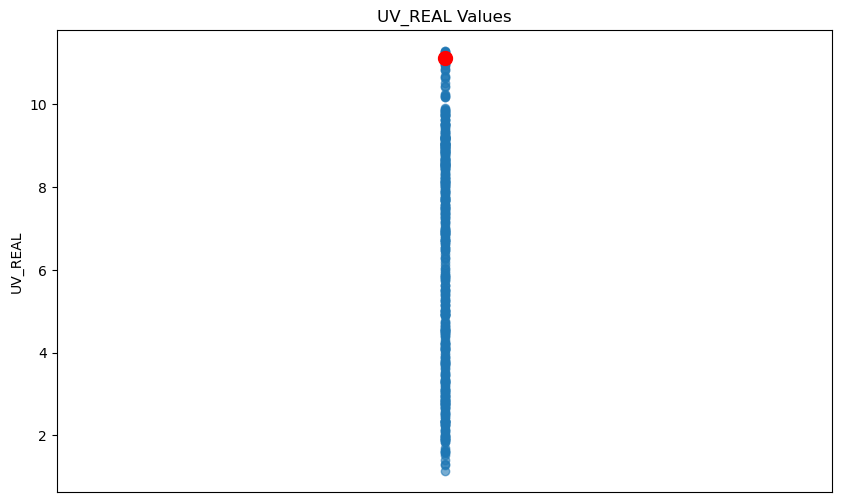

In [70]:
plt.figure(figsize=(10, 6))

# Create a list of y-values from the 'historical_uv' series for the stripplot
y_values = df_final_prob_uv_model[(df_final_prob_uv_model['DayOfYear'] == 284) & (df_final_prob_uv_model['Critical'] == False)][['zona','UV_REAL']].drop_duplicates()['UV_REAL'].tolist()
# Create a list of x-values, all set to 0, to make points appear on a vertical line
x_values = [0] * len(y_values)

# Use scatter plot to place all points at x=0
plt.scatter(x_values, y_values, alpha=0.6)

# Add the red dot for the example value
plt.scatter(0, df_final_prob_uv_model.loc[120699]['UV_REAL'], color='red', s=100, zorder=5)

plt.title('UV_REAL Values')
plt.ylabel('UV_REAL')
plt.xlabel('') # Remove x-axis label
plt.xticks([]) # Hide x-axis ticks
plt.xlim([-0.1, 0.1]) # Set narrow limits to keep points close to the center vertical line

plt.show()

En el siguiente observamos que no todos los valores con alta probabilidad crítica son críticos, sino que da para estudiar un poco más

In [71]:
df_final_prob_uv_model[(df_final_prob_uv_model['DayOfYear'] == 284) &
                (df_final_prob_uv_model['Fecha'] == '2005-10-11') &
                (df_final_prob_uv_model['zona'] == 3)].sort_values('Probability_Critical', ascending = False).head(50)

,Latitud,Longitud,ColumnAmountO3,ColumnAmountO3Precision,CloudFraction,CloudFractionPrecision,CloudPressure,CloudPressure_Precision,EffectiveTemperature,EffectiveTemperaturePrecision,...,zona_21,zona_22,zona_23,zona_24,zona_25,zona_26,zona_27,zona_28,zona_29,Probability_Critical
120698,-30.417,-55.664,242.899994,19.6,0.03,0.0,989.0,60.0,55.0,80.0,...,False,False,False,False,False,False,False,False,False,0.815397
120675,-30.668,-55.914,254.199997,16.0,0.02,0.0,989.0,65.0,92.0,-3.0,...,False,False,False,False,False,False,False,False,False,0.586856
120699,-30.417,-55.413,218.600006,14.1,0.03,0.0,997.0,72.0,-62.0,64.0,...,False,False,False,False,False,False,False,False,False,0.448616
120700,-30.417,-55.163,218.600006,14.1,0.03,0.0,997.0,72.0,-62.0,64.0,...,False,False,False,False,False,False,False,False,False,0.448616
120654,-30.918,-55.664,250.300003,6.3,0.02,0.0,992.0,75.0,12.0,23.0,...,False,False,False,False,False,False,False,False,False,0.066121
120655,-30.918,-55.413,250.300003,6.3,0.02,0.0,992.0,75.0,12.0,23.0,...,False,False,False,False,False,False,False,False,False,0.066121
120678,-30.668,-55.163,252.899994,5.8,0.03,0.0,1000.0,36.0,-62.0,64.0,...,False,False,False,False,False,False,False,False,False,0.058956
120653,-30.918,-55.914,256.000000,5.9,0.02,0.0,985.0,55.0,68.0,-101.0,...,False,False,False,False,False,False,False,False,False,0.058367
120721,-30.167,-55.413,263.799988,5.2,0.01,0.0,995.0,43.0,-62.0,64.0,...,False,False,False,False,False,False,False,False,False,0.047291
120722,-30.167,-55.163,263.799988,5.2,0.01,0.0,995.0,43.0,-62.0,64.0,...,False,False,False,False,False,False,False,False,False,0.047291


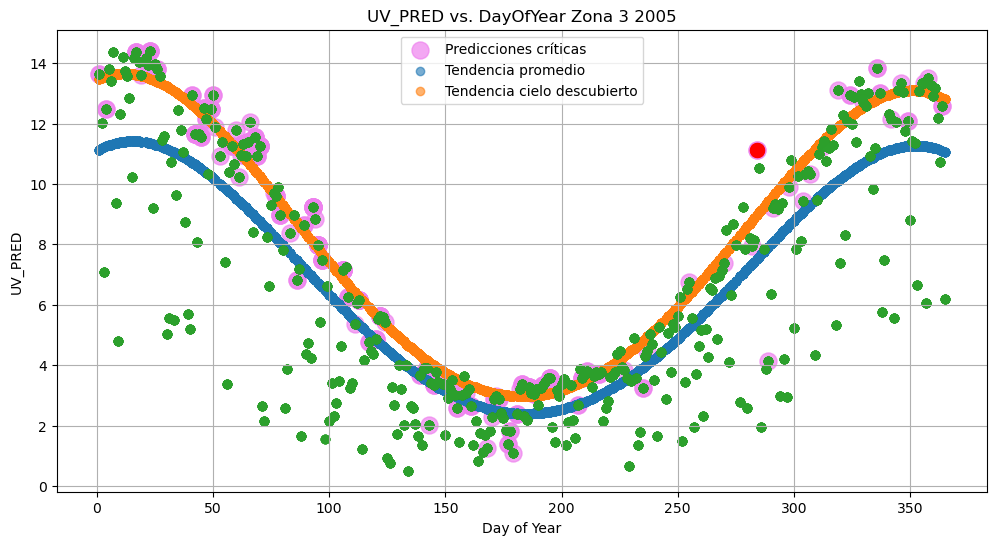

In [72]:
# Subsets
df_zona_26_2005 = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005)].copy()
df_zona_26_2005_critical = df_final_prob_uv_model[(df_final_prob_uv_model['DayOfYear'] == 284) & (df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005) & (df_final_prob_uv_model['Critical'] == True)].copy()
df_zona_clas_critical = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005) & (df_final_prob_uv_model['Probability_Critical'] >= 0.5)].copy()
df_zona_26 = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3)].copy()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_zona_clas_critical['DayOfYear'], df_zona_clas_critical['UV_REAL'], color='violet', s=150, alpha=0.7, label = 'Predicciones críticas') # Predicho como crítico
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_PROM'], label = "Tendencia promedio", alpha=0.6) # Linea tendencia promedio
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_DESC'], label = "Tendencia cielo descubierto", alpha=0.6) # Linea tendencia descubierto
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_REAL'], alpha=0.6) # Valor prediccion
plt.scatter(df_zona_26_2005_critical['DayOfYear'], df_zona_26_2005_critical['UV_REAL'], color='red', s=100, zorder=5) # Punto Ejemplo
plt.title('UV_PRED vs. DayOfYear Zona 3 2005')
plt.xlabel('Day of Year')
plt.ylabel('UV_PRED')
plt.grid(True)
plt.legend()
plt.show()

## Modelo 2 (Target de ozono crítico, sin métricas de Precision)

### Pre-Procesamiento

In [73]:
# Define features and target
features = [
  'CloudFraction', 'CloudPressure',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']
target = 'Critical'

# Drop na
df_final_prob_uv_model = df_final.copy()
df_final_prob_uv_model.dropna(subset=features + [target], inplace=True)

# Mask Target
df_final_prob_uv_model[target] = df_final_prob_uv_model[target].astype(int)

# Normalize features
for feature in features:
  df_final_prob_uv_model[feature + '_NORMALIZED'] = (df_final_prob_uv_model[feature] - df_final_prob_uv_model[feature].min()) / (df_final_prob_uv_model[feature].max() - df_final_prob_uv_model[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_final_prob_uv_model['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_final_prob_uv_model['zona'], prefix='zona')
df_final_prob_uv_model = pd.concat([df_final_prob_uv_model, dummies], axis=1)

X = df_final_prob_uv_model[features_normalized + features_dummy_zones]
y = df_final_prob_uv_model[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 Critical
0    1974431
1       3926
Name: count, dtype: int64

Resampled training set class distribution:
 Critical
0    1974431
1    1974431
Name: count, dtype: int64


### Entrenamiento

In [74]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [75]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[313585 180024]
 [   260    721]]

ROC AUC Score: 0.7471682288681614

Balanced Accuracy Score: 0.6851273012419465

Precision: 0.003989045340120059
Recall: 0.7349643221202854
F1 Score: 0.007935023056689743
Accuracy: 0.6354879799429831


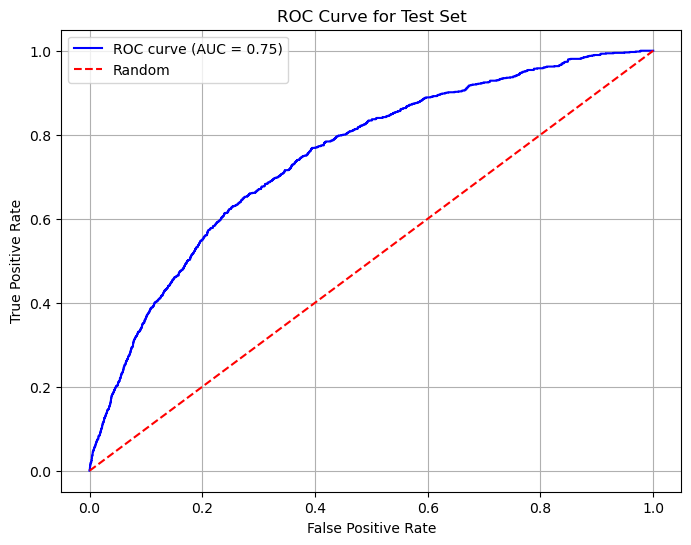

In [76]:
# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Show the weights (coefficients) for the features
print("\nModel Coefficients (Weights):")
for feature, weight in zip(features + features_dummy_zones, model.coef_[0]):
    print(f"{feature}: {weight:.4f}")

# Show the intercept (bias)
print(f"\nModel Intercept (Bias): {model.intercept_[0]:.4f}")


Model Coefficients (Weights):
CloudFraction: -2.1579
CloudPressure: 0.0219
UV_REAL: 0.5297
UV_PRED_PROM: -0.7110
UV_PRED_DESC: -0.6287
OZONO_PRED: -1.9284
UV_DIF_PROM: 1.0047
UV_DIF_DESC: 0.9618
zona_0: 0.4121
zona_1: 0.1316
zona_2: 0.3543
zona_3: 0.3657
zona_4: 0.0719
zona_5: 0.1277
zona_6: 0.4993
zona_7: 0.2778
zona_8: 0.4869
zona_9: 0.2469
zona_10: 0.0883
zona_11: 0.3686
zona_12: 0.2847
zona_13: -0.1722
zona_14: 0.0861
zona_15: 0.1405
zona_16: 0.1796
zona_17: -0.0301
zona_18: -0.4507
zona_19: -0.2123
zona_20: -0.0540
zona_21: -0.0436
zona_22: -0.2646
zona_23: -0.2703
zona_24: -0.3369
zona_25: -0.2371
zona_26: -0.2723
zona_27: -0.2956
zona_28: -0.5454
zona_29: -0.6805

Model Intercept (Bias): 0.2565


In [78]:
# Agrego columna de probabilidad
df_final_prob_uv_model['Probability_Critical'] = model.predict_proba(df_final_prob_uv_model[features_normalized + features_dummy_zones])[:, 1]

### Ejemplo

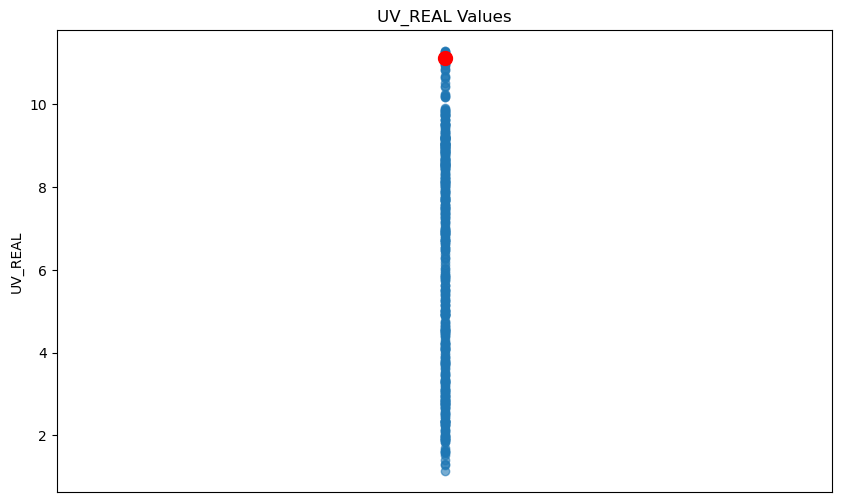

In [79]:
plt.figure(figsize=(10, 6))

# Create a list of y-values from the 'historical_uv' series for the stripplot
y_values = df_final_prob_uv_model[(df_final_prob_uv_model['DayOfYear'] == 284) & (df_final_prob_uv_model['Critical'] == False)][['zona','UV_REAL']].drop_duplicates()['UV_REAL'].tolist()
# Create a list of x-values, all set to 0, to make points appear on a vertical line
x_values = [0] * len(y_values)

# Use scatter plot to place all points at x=0
plt.scatter(x_values, y_values, alpha=0.6)

# Add the red dot for the example value
plt.scatter(0, df_final_prob_uv_model.loc[120699]['UV_REAL'], color='red', s=100, zorder=5)

plt.title('UV_REAL Values')
plt.ylabel('UV_REAL')
plt.xlabel('') # Remove x-axis label
plt.xticks([]) # Hide x-axis ticks
plt.xlim([-0.1, 0.1]) # Set narrow limits to keep points close to the center vertical line

plt.show()

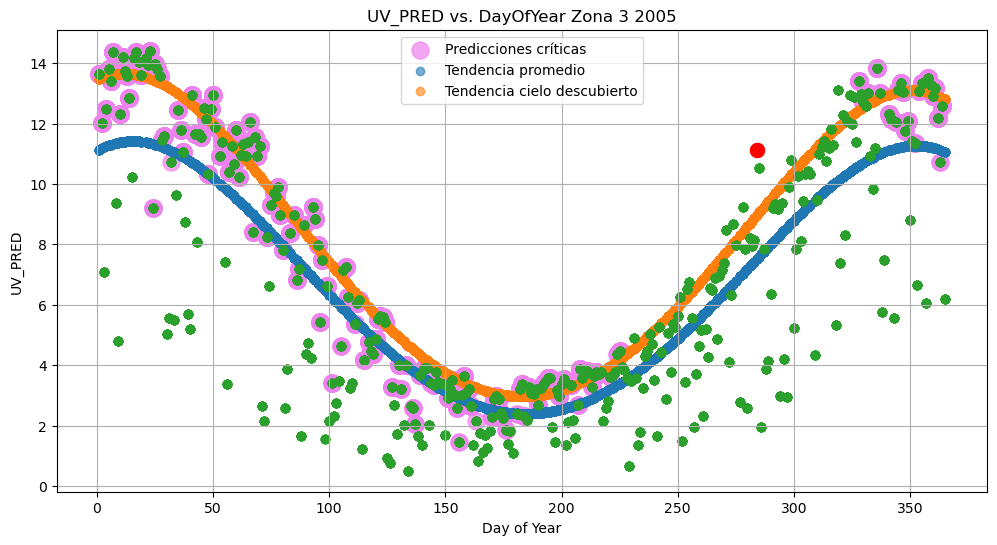

In [80]:
# Subsets
df_zona_26_2005 = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005)].copy()
df_zona_26_2005_critical = df_final_prob_uv_model[(df_final_prob_uv_model['DayOfYear'] == 284) & (df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005) & (df_final_prob_uv_model['Critical'] == True)].copy()
df_zona_clas_critical = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3) & (df_final_prob_uv_model['Fecha'].dt.year == 2005) & (df_final_prob_uv_model['Probability_Critical'] >= 0.5)].copy()
df_zona_26 = df_final_prob_uv_model[(df_final_prob_uv_model['zona'] == 3)].copy()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_zona_clas_critical['DayOfYear'], df_zona_clas_critical['UV_REAL'], color='violet', s=150, alpha=0.7, label = 'Predicciones críticas') # Predicho como crítico
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_PROM'], label = "Tendencia promedio", alpha=0.6) # Linea tendencia promedio
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_PRED_DESC'], label = "Tendencia cielo descubierto", alpha=0.6) # Linea tendencia descubierto
plt.scatter(df_zona_26_2005['DayOfYear'], df_zona_26_2005['UV_REAL'], alpha=0.6) # Valor prediccion
plt.scatter(df_zona_26_2005_critical['DayOfYear'], df_zona_26_2005_critical['UV_REAL'], color='red', s=100, zorder=5) # Punto Ejemplo
plt.title('UV_PRED vs. DayOfYear Zona 3 2005')
plt.xlabel('Day of Year')
plt.ylabel('UV_PRED')
plt.grid(True)
plt.legend()
plt.show()

## Modelo 3

### Pre-procesamiento

In [81]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']

target = 'CSUM_FLG'

df_modelo_3 = df_final.copy()
df_modelo_3[target] = np.where(df_modelo_3['ColumnAmountO3&Precision'] < 220, 1, 0)

df_modelo_3[target] = df_modelo_3[target].astype(int)

df_modelo_3.dropna(subset=features + [target], inplace=True)

# Mask Target
df_modelo_3[target] = df_modelo_3[target].astype(int)

# Normalize features
for feature in features:
  df_modelo_3[feature + '_NORMALIZED'] = (df_modelo_3[feature] - df_modelo_3[feature].min()) / (df_modelo_3[feature].max() - df_modelo_3[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_modelo_3['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_modelo_3['zona'], prefix='zona')
df_modelo_3 = pd.concat([df_modelo_3, dummies], axis=1)

X = df_modelo_3[features_normalized + features_dummy_zones]
y = df_modelo_3[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 CSUM_FLG
0    1977611
1        746
Name: count, dtype: int64

Resampled training set class distribution:
 CSUM_FLG
0    1977611
1    1977611
Name: count, dtype: int64


### Entrenamiento

In [82]:
# Modelo balanceado
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [83]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[465831  28572]
 [    16    171]]

ROC AUC Score: 0.9825654147933032

Balanced Accuracy Score: 0.9283237956054404

Precision: 0.005949274605991024
Recall: 0.9144385026737968
F1 Score: 0.01182163843760802
Accuracy: 0.9421985887300592


### Thresholds

In [84]:
# Treshold twinkering
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)[:, 1])
precision_list = []
recall_list = []

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
    print("\nPrecision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))

    precision_list.append(tp / (tp + fp))
    recall_list.append(tp / (tp + fn))


******** For i = 0.05 ******

Precision: 0.0009486077785837844
Recall: 1.0
F1 Score: 0.001895417549336604
Accuracy: 0.601803514021715

******** For i = 0.1 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.0014195703332574206
Recall: 1.0
F1 Score: 0.0028351160199216172
Accuracy: 0.7340362724681049

******** For i = 0.15 ******

Precision: 0.0019419693854238064
Recall: 1.0
F1 Score: 0.003876410899555353
Accuracy: 0.8056834954204493

******** For i = 0.2 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.002498589505924075
Recall: 0.9946524064171123
F1 Score: 0.00498465743879725
Accuracy: 0.8498615014456419

******** For i = 0.25 ******

Precision: 0.0030655937088685625
Recall: 0.983957219251337
F1 Score: 0.006112144565506245
Accuracy: 0.8790108979154451

******** For i = 0.3 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.003651319089176447
Recall: 0.9732620320855615
F1 Score: 0.007275343779980813
Accuracy: 0.8995774277684547

******** For i = 0.35 ******

Precision: 0.004233999012066897
Recall: 0.9625668449197861
F1 Score: 0.008430913348946136
Accuracy: 0.9143937402697183

******** For i = 0.4 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.004832622919664431
Recall: 0.9518716577540107
F1 Score: 0.009616423554835224
Accuracy: 0.9258699124527386

******** For i = 0.45 ******

Precision: 0.005376177970029353
Recall: 0.93048128342246
F1 Score: 0.010690587367903662
Accuracy: 0.9348874825613134

******** For i = 0.5 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.005949274605991024
Recall: 0.9144385026737968
F1 Score: 0.01182163843760802
Accuracy: 0.9421985887300592

******** For i = 0.55 ******

Precision: 0.006613499319198599
Recall: 0.9090909090909091
F1 Score: 0.013131469179669395
Accuracy: 0.9483370064093491

******** For i = 0.6 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.007261724659606656
Recall: 0.8983957219251337
F1 Score: 0.014406997684589657
Accuracy: 0.9535251420368386

******** For i = 0.65 ******

Precision: 0.007909496189060927
Recall: 0.8823529411764706
F1 Score: 0.015678449258836945
Accuracy: 0.9581107584059524

******** For i = 0.7 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.008847184986595175
Recall: 0.8823529411764706
F1 Score: 0.017518713170887084
Accuracy: 0.9625811278028266

******** For i = 0.75 ******

Precision: 0.009838622592837003
Recall: 0.8770053475935828
F1 Score: 0.01945894636924537
Accuracy: 0.9665824218039184

******** For i = 0.8 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.010624705803241208
Recall: 0.8449197860962567
F1 Score: 0.02098552264576969
Accuracy: 0.9701934936007602

******** For i = 0.85 ******

Precision: 0.011811023622047244
Recall: 0.8181818181818182
F1 Score: 0.02328589909443726
Accuracy: 0.974049212479023

******** For i = 0.9 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.013423440103684504
Recall: 0.7754010695187166
F1 Score: 0.02639002639002639
Accuracy: 0.9783679411229503

******** For i = 0.95 ******

Precision: 0.015615469074051482
Recall: 0.6844919786096256
F1 Score: 0.030534351145038167
Accuracy: 0.9835661861339695

******** For i = 0.99 ******


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\961026331.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)



Precision: 0.022909507445589918
Recall: 0.5347593582887701
F1 Score: 0.043936731107205626
Accuracy: 0.9912007925756687


C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\1250822055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


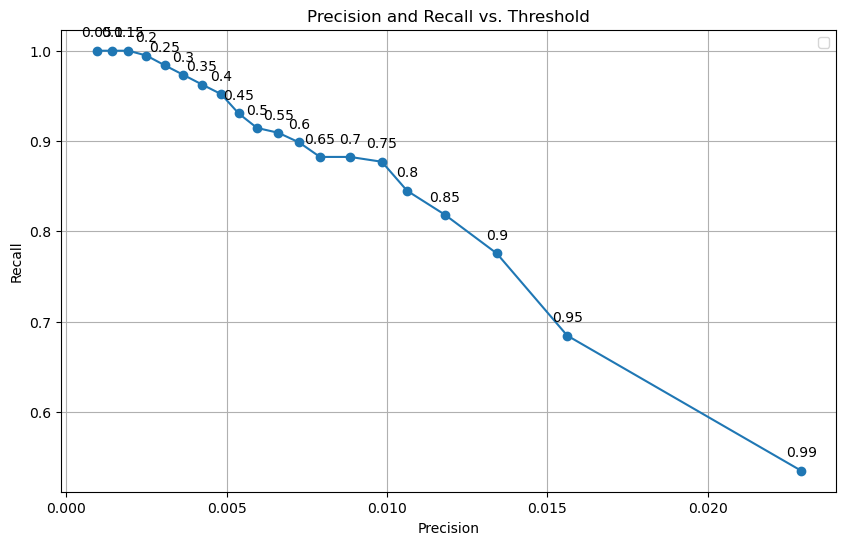

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Annotate every point using threshold_list values
for i, txt in enumerate(threshold_list):
    plt.annotate(f'{txt}', (precision_list[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Incidencias

## Incidencia de la nubes sobre el nivel de UV en Uruguay

Visualización de la distribución de cielo descubierto

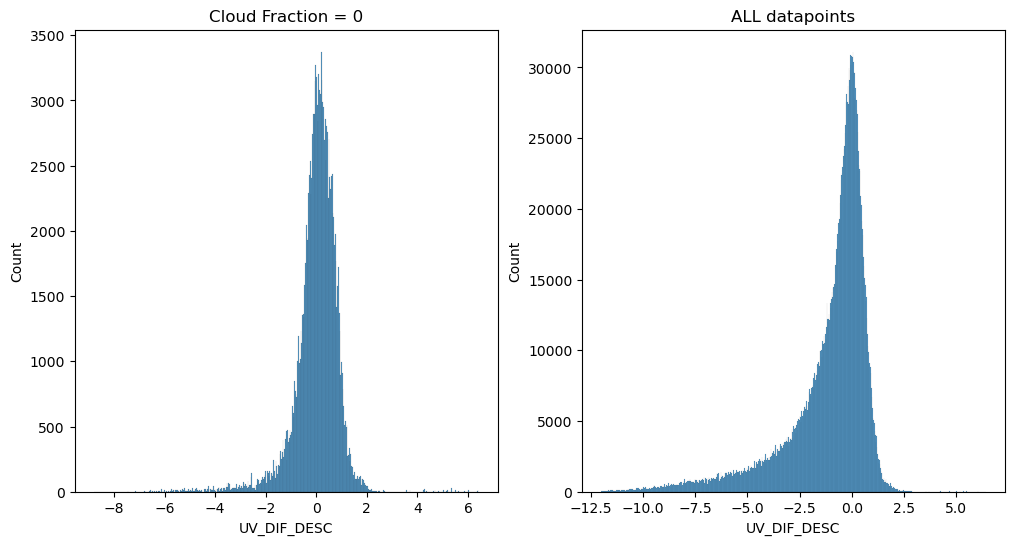

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_final[df_final['CloudFraction'] == 0]['UV_DIF_DESC'], ax=ax[0])
sns.histplot(df_final['UV_DIF_DESC'], ax=ax[1])
ax[0].title.set_text('Cloud Fraction = 0')
ax[1].title.set_text('ALL datapoints')
plt.show()

In [87]:
dif_prom_desc = df_final[df_final['CloudFraction'] == 0]['UV_DIF_DESC'].mean()
dif_prom = df_final['UV_DIF_DESC'].mean()

print('Diferencia de UV real vs Modelo CON CIELO DESCUBIERTO:', round(dif_prom_desc,2), 'UV')
print('Diferencia de UV real vs Modelo SIN CIELO DESCUBIERTO:', round(dif_prom,2), 'UV')

print('La diferencia promedio generada por el factor nubes es de', round(dif_prom + dif_prom_desc, 2), 'UV')

Diferencia de UV real vs Modelo CON CIELO DESCUBIERTO: 0.01 UV
Diferencia de UV real vs Modelo SIN CIELO DESCUBIERTO: -1.12 UV
La diferencia promedio generada por el factor nubes es de -1.11 UV


Correlación significante y en dirección opuesta entre CloudFraction y UV_REAL

In [88]:
df_final[['CloudFraction','UV_REAL']].corr()

,CloudFraction,UV_REAL
CloudFraction,1.000000,-0.509074
UV_REAL,-0.509074,1.000000


## Incidencia del ruido del satelite sobre las predicciones

Distribución de la precisión del ozono

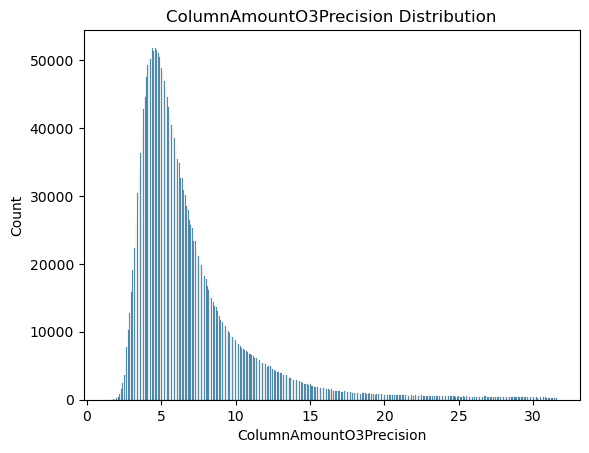

In [89]:
q = df_final['ColumnAmountO3Precision'].quantile(0.99)
df_quantile = df_final[df_final['ColumnAmountO3Precision'] <= q]
sns.histplot(df_quantile['ColumnAmountO3Precision'])
plt.title('ColumnAmountO3Precision Distribution')
plt.show()

Correlación valores de ozono crítico/precisón. Valores promedio por rango

In [90]:
df_final[['ColumnAmountO3Precision','Critical']].corr()

,ColumnAmountO3Precision,Critical
ColumnAmountO3Precision,1.000000,0.190878
Critical,0.190878,1.000000


In [91]:
prom_prec_crit = df_final[df_final['Critical'] == True]['ColumnAmountO3Precision'].mean()
prom_prec = df_final['ColumnAmountO3Precision'].mean()

print('Precision promedio crítica:', round(prom_prec_crit,2), 'DU')
print('Precision promedio normal:', round(prom_prec,2), 'DU')

Precision promedio crítica: 30.34 DU
Precision promedio normal: 7.32 DU


Promedio por rango

In [92]:
q_25 = df_final['ColumnAmountO3Precision'].quantile(0.25)
q_50 = df_final['ColumnAmountO3Precision'].quantile(0.5)
q_90 = df_final['ColumnAmountO3Precision'].quantile(0.90)
q_95 = df_final['ColumnAmountO3Precision'].quantile(0.95)

prom_prec_alta = df_final[df_final['ColumnAmountO3Precision'] <= q_25]['ColumnAmountO3'].mean()
prom_prec_baja = df_final[df_final['ColumnAmountO3Precision'] > q_50]['ColumnAmountO3'].mean()
prom_prec_muybaja = df_final[df_final['ColumnAmountO3Precision'] > q_90]['ColumnAmountO3'].mean()
prom_prec_extremabaja = df_final[df_final['ColumnAmountO3Precision'] > q_95]['ColumnAmountO3'].mean()

print('Nivel promedio de Ozono con ALTA presición:', round(prom_prec_alta,2), 'DU')
print('Nivel promedio de Ozono con NORMAL presición:', round(prom_prec_baja,2), 'DU')
print('Nivel promedio de Ozono con BAJA presición:', round(prom_prec_muybaja,2), 'DU')
print('Nivel promedio de Ozono con MUY BAJA presición:', round(prom_prec_extremabaja,2), 'DU')

Nivel promedio de Ozono con ALTA presición: 280.7 DU
Nivel promedio de Ozono con NORMAL presición: 280.31 DU
Nivel promedio de Ozono con BAJA presición: 281.21 DU
Nivel promedio de Ozono con MUY BAJA presición: 281.85 DU


Desviación por rango

In [93]:
prom_prec_alta = df_final[df_final['ColumnAmountO3Precision'] <= q_25]['ColumnAmountO3'].std()
prom_prec_baja = df_final[df_final['ColumnAmountO3Precision'] > q_50]['ColumnAmountO3'].std()
prom_prec_muybaja = df_final[df_final['ColumnAmountO3Precision'] > q_90]['ColumnAmountO3'].std()
prom_prec_extremabaja = df_final[df_final['ColumnAmountO3Precision'] > q_95]['ColumnAmountO3'].std()

print('Desviación estandar del ozono con ALTA presición:', round(prom_prec_alta,2), 'DU')
print('Desviación estandar del ozono con NORMAL presición:', round(prom_prec_baja,2), 'DU')
print('Desviación estandar del ozono con BAJA presición:', round(prom_prec_muybaja,2), 'DU')
print('Desviación estandar del ozono con MUY BAJA presición:', round(prom_prec_extremabaja,2), 'DU')

Desviación estandar del ozono con ALTA presición: 21.67 DU
Desviación estandar del ozono con NORMAL presición: 24.55 DU
Desviación estandar del ozono con BAJA presición: 30.53 DU
Desviación estandar del ozono con MUY BAJA presición: 35.12 DU


## Modelo 0 Excluyendo ozono alto

### Pre-procesamiento

In [114]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']

target = 'Target'

# Drop na
df_modelo_0 = df_final.copy()

df_modelo_0 = df_modelo_0[(df_modelo_0['ColumnAmountO3'] - df_modelo_0['ColumnAmountO3Precision']) <= 220]
df_modelo_0.dropna(subset=features + [target], inplace=True)

# Mask Target
df_modelo_0[target] = df_modelo_0[target].astype(int)

# Normalize features
for feature in features:
  df_modelo_0[feature + '_NORMALIZED'] = (df_modelo_0[feature] - df_modelo_0[feature].min()) / (df_modelo_0[feature].max() - df_modelo_0[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_modelo_0['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_modelo_0['zona'], prefix='zona')
df_modelo_0 = pd.concat([df_modelo_0, dummies], axis=1)

X = df_modelo_0[features_normalized + features_dummy_zones]
y = df_modelo_0[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 Target
0    15267
1      888
Name: count, dtype: int64

Resampled training set class distribution:
 Target
0    15267
1    15267
Name: count, dtype: int64


### Entrenamiento

In [115]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [116]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[3035  782]
 [  25  197]]

ROC AUC Score: 0.9195219584268576

Balanced Accuracy Score: 0.841257225262989

Precision: 0.20122574055158324
Recall: 0.8873873873873874
F1 Score: 0.32805995004163196
Accuracy: 0.8001980688289181


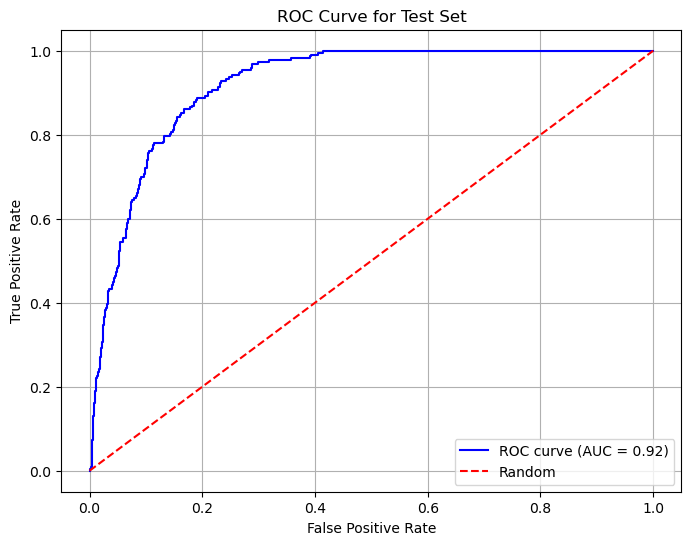

In [117]:
# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
# Agrego columna de probabilidad
df_modelo_0['Probability_Critical'] = model.predict_proba(df_modelo_0[features_normalized + features_dummy_zones])[:, 1]
df_modelo_0['Probability_Critical'] = df_modelo_0['Probability_Critical'].round(4)

### Thresholds

In [119]:
# Treshold twinkering
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)[:, 1])
precision_list = []
recall_list = []

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
    print("\nPrecision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))

    precision_list.append(tp / (tp + fp))
    recall_list.append(tp / (tp + fn))


******** For i = 0.05 ******

Precision: 0.09064924458962842
Recall: 1.0
F1 Score: 0.1662298764507675
Accuracy: 0.44862589749938103

******** For i = 0.1 ******

Precision: 0.10127737226277372
Recall: 1.0
F1 Score: 0.18392709196354598
Accuracy: 0.5122555087893043

******** For i = 0.15 ******

Precision: 0.11326530612244898
Recall: 1.0
F1 Score: 0.20348304307974335
Accuracy: 0.5696954691755385

******** For i = 0.2 ******

Precision: 0.12464749012972363
Recall: 0.9954954954954955
F1 Score: 0.22155388471177945
Accuracy: 0.6154988858628373

******** For i = 0.25 ******

Precision: 0.13498452012383902
Recall: 0.9819819819819819
F1 Score: 0.23734349482852476
Accuracy: 0.6531319633572666

******** For i = 0.3 ******

Precision: 0.14955203308063406
Recall: 0.9774774774774775
F1 Score: 0.2594142259414226
Accuracy: 0.6932409012131716

******** For i = 0.35 ******

Precision: 0.15925925925925927
Recall: 0.9684684684684685
F1 Score: 0.27353689567430023
Accuracy: 0.717256746719485

******** For 

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map 

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\1250822055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


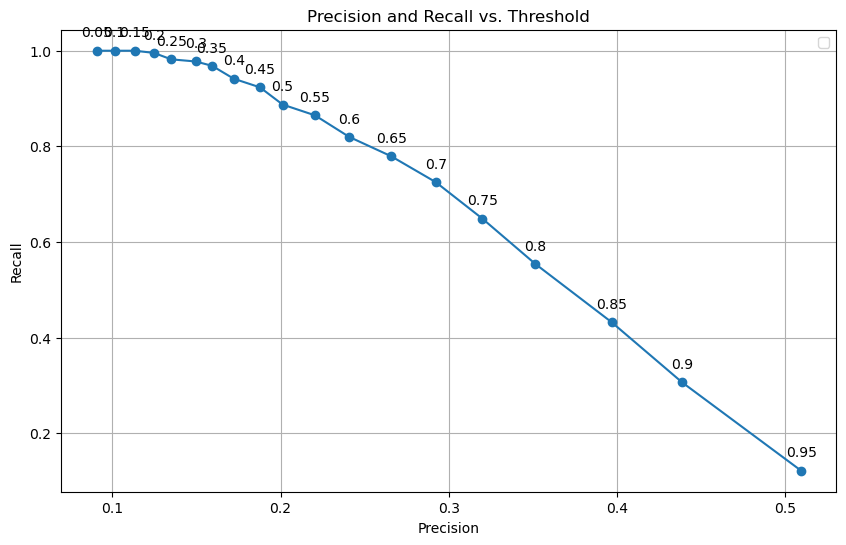

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Annotate every point using threshold_list values
for i, txt in enumerate(threshold_list):
    plt.annotate(f'{txt}', (precision_list[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplos

In [121]:
df_modelo_0[df_modelo_0['Critical'] == True].sort_values('Probability_Critical')[['Fecha','zona','ColumnAmountO3','DayOfYear','Probability_Critical']]

,Fecha,zona,ColumnAmountO3,DayOfYear,Probability_Critical
217486,2006-05-29,1,208.600006,149,0.0000
1473571,2016-05-14,0,213.600006,135,0.0000
1473572,2016-05-14,0,213.600006,135,0.0000
1198421,2014-02-13,29,171.600006,44,0.0000
1198420,2014-02-13,28,171.600006,44,0.0000
...,...,...,...,...,...
2410529,2024-06-07,21,214.699997,159,0.9950
188110,2006-03-21,28,209.100006,80,0.9955
188088,2006-03-21,28,217.899994,80,0.9956
188038,2006-03-21,27,218.300003,80,0.9963


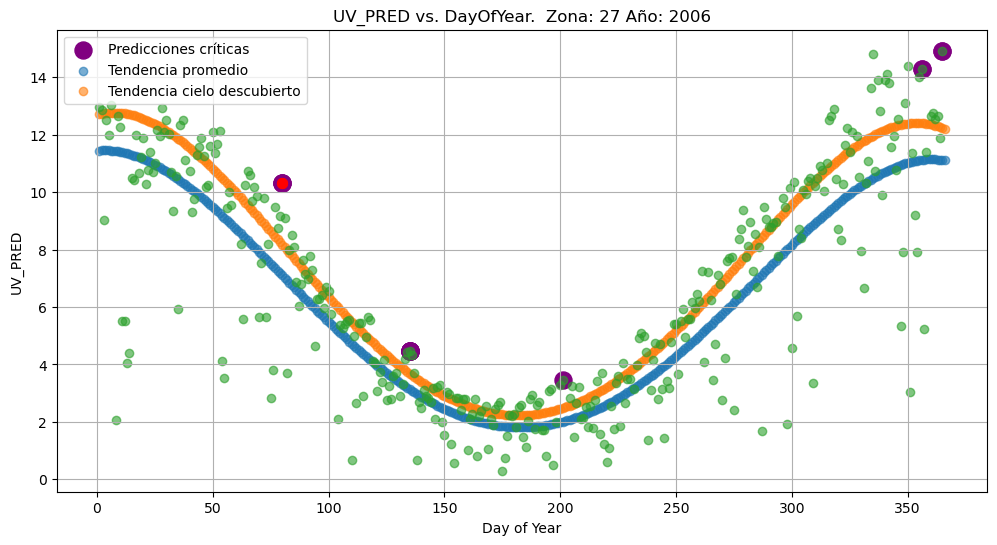

In [122]:
# Variables
zona = 27
año = 2006
dia_año = 80
threshold = 0.9

# Subsets
df_zona_26_2005 = df_modelo_0[(df_modelo_0['zona'] == zona) & (df_modelo_0['Fecha'].dt.year == año)].copy()
df_zona_26_2005_critical = df_modelo_0[(df_modelo_0['DayOfYear'] == dia_año) & (df_modelo_0['zona'] == zona) & (df_modelo_0['Fecha'].dt.year == año) & (df_modelo_0['Critical'] == True)].copy()
df_zona_clas_critical = df_modelo_0[(df_modelo_0['zona'] == zona) & (df_modelo_0['Fecha'].dt.year == año) & (df_modelo_0['Probability_Critical'] >= threshold)].copy()
df_zona_26 = df_modelo_0[(df_modelo_0['zona'] == zona)].copy()
df_modelo_zona = df_final[df_final['zona'] == zona][['DayOfYear','UV_PRED_DESC','UV_PRED_PROM']].drop_duplicates()
df_uv_zona = df_final[(df_final['zona'] == zona) & (df_final['Fecha'].dt.year == año) ][['DayOfYear','UV_REAL']].drop_duplicates()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_zona_clas_critical['DayOfYear'], df_zona_clas_critical['UV_REAL'], color='purple', s=150, alpha=1, label = 'Predicciones críticas') # Predicho como crítico
plt.scatter(df_modelo_zona['DayOfYear'], df_modelo_zona['UV_PRED_PROM'], label = "Tendencia promedio", alpha=0.6) # Linea tendencia promedio
plt.scatter(df_modelo_zona['DayOfYear'], df_modelo_zona['UV_PRED_DESC'], label = "Tendencia cielo descubierto", alpha=0.6) # Linea tendencia descubierto
plt.scatter(df_uv_zona['DayOfYear'], df_uv_zona['UV_REAL'], alpha=0.6) # Valores de UV
plt.scatter(df_zona_26_2005_critical['DayOfYear'], df_zona_26_2005_critical['UV_REAL'], color='red', s=50, zorder=5) # Punto Ejemplo
plt.title(f'UV_PRED vs. DayOfYear.  Zona: {zona} Año: {año}')
plt.xlabel('Day of Year')
plt.ylabel('UV_PRED')
plt.grid(True)
plt.legend()
plt.show()

## Modelo 1 Excluyendo ozono alto

### Pre-procesamiento

In [123]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']
target = 'Critical'

# Drop na
df_final_prob_uv_model = df_final.copy()
df_final_prob_uv_model.dropna(subset=features + [target], inplace=True)

# Filter data
df_final_prob_uv_model = df_final_prob_uv_model[(df_final_prob_uv_model['ColumnAmountO3'] - df_final_prob_uv_model['ColumnAmountO3Precision']) <= 220]

# Mask Target
df_final_prob_uv_model[target] = df_final_prob_uv_model[target].astype(int)

# Normalize features
for feature in features:
  df_final_prob_uv_model[feature + '_NORMALIZED'] = (df_final_prob_uv_model[feature] - df_final_prob_uv_model[feature].min()) / (df_final_prob_uv_model[feature].max() - df_final_prob_uv_model[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_final_prob_uv_model['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_final_prob_uv_model['zona'], prefix='zona')
df_final_prob_uv_model = pd.concat([df_final_prob_uv_model, dummies], axis=1)

X = df_final_prob_uv_model[features_normalized + features_dummy_zones]
y = df_final_prob_uv_model[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 Critical
0    12229
1     3926
Name: count, dtype: int64

Resampled training set class distribution:
 Critical
1    12229
0    12229
Name: count, dtype: int64


### Entrenamiento

In [124]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [125]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[2027 1031]
 [ 401  580]]

ROC AUC Score: 0.6725318660834468

Balanced Accuracy Score: 0.6270424861111945

Precision: 0.3600248292985723
Recall: 0.5912334352701325
F1 Score: 0.44753086419753085
Accuracy: 0.6454567962366923


### Thresholds

In [126]:
# Treshold twinkering
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)[:, 1])
precision_list = []
recall_list = []

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
    print("\nPrecision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))

    precision_list.append(tp / (tp + fp))
    recall_list.append(tp / (tp + fn))


******** For i = 0.05 ******

Precision: 0.24294205052005943
Recall: 1.0
F1 Score: 0.3909145248057382
Accuracy: 0.24312948749690516

******** For i = 0.1 ******

Precision: 0.24353233830845772
Recall: 0.9979612640163099
F1 Score: 0.3915216956608678
Accuracy: 0.24659569200297105

******** For i = 0.15 ******

Precision: 0.24534474081529944
Recall: 0.9938837920489296
F1 Score: 0.39354187689202824
Accuracy: 0.2560039613765784

******** For i = 0.2 ******

Precision: 0.24891165172855315
Recall: 0.9908256880733946
F1 Score: 0.3978714695047073
Accuracy: 0.2716018816538747

******** For i = 0.25 ******

Precision: 0.2544067350697185
Recall: 0.9857288481141692
F1 Score: 0.40443329150982854
Accuracy: 0.2948749690517455

******** For i = 0.3 ******

Precision: 0.26199669056811914
Recall: 0.9683995922528033
F1 Score: 0.412415888864771
Accuracy: 0.3297846001485516

******** For i = 0.35 ******

Precision: 0.27717391304347827
Recall: 0.9357798165137615
F1 Score: 0.4276729559748428
Accuracy: 0.3916

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3566605693.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3566605693.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3566605693.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3566605693.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3566605693.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map 

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\1250822055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


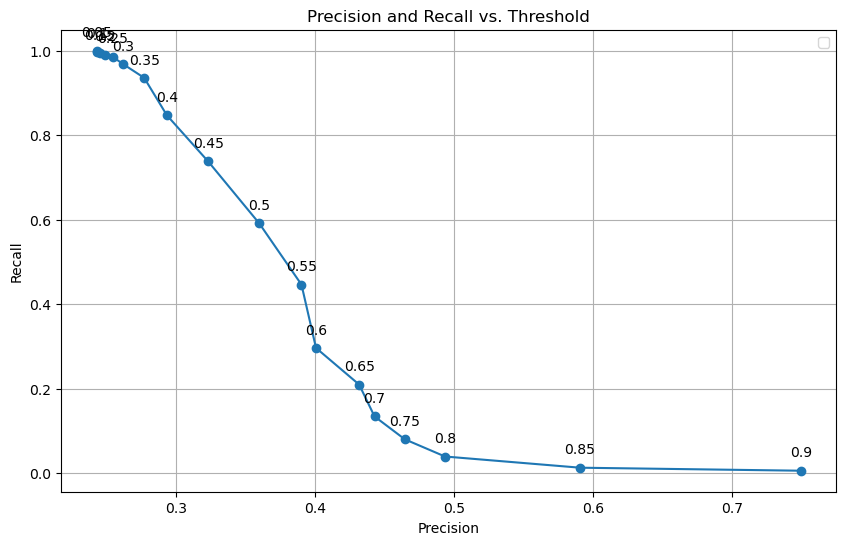

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Annotate every point using threshold_list values
for i, txt in enumerate(threshold_list):
    plt.annotate(f'{txt}', (precision_list[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

## Modelo 3 Excluyendo ozono alto

### Pre-procesamiento

In [128]:
# Define features and target
features = [
  'ColumnAmountO3Precision', 'CloudFraction', 'CloudFractionPrecision', 'CloudPressure',
  'CloudPressure_Precision',
  'UV_REAL', 'UV_PRED_PROM', 'UV_PRED_DESC', 'OZONO_PRED', 'UV_DIF_PROM', 'UV_DIF_DESC']

target = 'CSUM_FLG'

df_modelo_3 = df_final.copy()

# Create target
df_modelo_3[target] = np.where(df_modelo_3['ColumnAmountO3&Precision'] < 220, 1, 0)
df_modelo_3[target] = df_modelo_3[target].astype(int)

# Filter data
df_modelo_3 = df_modelo_3[(df_modelo_3['ColumnAmountO3'] - df_modelo_3['ColumnAmountO3Precision']) <= 220]

# Drop na
df_modelo_3.dropna(subset=features + [target], inplace=True)

# Mask Target
df_modelo_3[target] = df_modelo_3[target].astype(int)

# Normalize features
for feature in features:
  df_modelo_3[feature + '_NORMALIZED'] = (df_modelo_3[feature] - df_modelo_3[feature].min()) / (df_modelo_3[feature].max() - df_modelo_3[feature].min())

features_normalized = [i + '_NORMALIZED' for i in features]

# Get dummies
features_dummy_zones = [f'zona_{i}' for i in df_modelo_3['zona'].sort_values().unique()]
dummies = pd.get_dummies(df_modelo_3['zona'], prefix='zona')
df_modelo_3 = pd.concat([df_modelo_3, dummies], axis=1)

X = df_modelo_3[features_normalized + features_dummy_zones]
y = df_modelo_3[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp) # 0.25 * 0.8 = 0.2

# Check the initial class distribution in the training set
print("Original training set class distribution:\n", y_train.value_counts())

# Balance the training dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nResampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set class distribution:
 CSUM_FLG
0    15409
1      746
Name: count, dtype: int64

Resampled training set class distribution:
 CSUM_FLG
0    15409
1    15409
Name: count, dtype: int64


### Entrenamiento

In [129]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Validación

In [130]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

#TN | FP
#FN | TP

# Evaluate the model on the test set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_test_prob))
print("\nBalanced Accuracy Score:", balanced_accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
print("\nPrecision:", tp / (tp + fp))
print("Recall:", tp / (tp + fn))
print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))


--- Test Set Evaluation ---
Confusion Matrix:
 [[2467 1385]
 [  65  122]]

ROC AUC Score: 0.6936336981691572

Balanced Accuracy Score: 0.6464264691999712

Precision: 0.0809555408095554
Recall: 0.6524064171122995
F1 Score: 0.14403778040141677
Accuracy: 0.6410002475860361


### Thresholds

In [131]:
# Treshold twinkering
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)[:, 1])
precision_list = []
recall_list = []

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel().tolist()
    print("\nPrecision:", tp / (tp + fp))
    print("Recall:", tp / (tp + fn))
    print("F1 Score:", 2 * tp / (2 * tp + fp + fn))
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))

    precision_list.append(tp / (tp + fp))
    recall_list.append(tp / (tp + fn))


******** For i = 0.05 ******

Precision: 0.04660486093710849
Recall: 0.9946524064171123
F1 Score: 0.08903781713738632
Accuracy: 0.057687546422381775

******** For i = 0.1 ******

Precision: 0.047876447876447875
Recall: 0.9946524064171123
F1 Score: 0.09135559921414538
Accuracy: 0.08393166625402328

******** For i = 0.15 ******

Precision: 0.04878048780487805
Recall: 0.983957219251337
F1 Score: 0.09295276584996211
Accuracy: 0.11091854419410745

******** For i = 0.2 ******

Precision: 0.050373650705784666
Recall: 0.9732620320855615
F1 Score: 0.09578947368421052
Accuracy: 0.14929437979697946

******** For i = 0.25 ******

Precision: 0.052243211334120424
Recall: 0.946524064171123
F1 Score: 0.09902097902097902
Accuracy: 0.20252537756870512

******** For i = 0.3 ******

Precision: 0.05473419314249764
Recall: 0.93048128342246
F1 Score: 0.10338680926916222
Accuracy: 0.25278534290666005

******** For i = 0.35 ******

Precision: 0.057799442896935935
Recall: 0.8877005347593583
F1 Score: 0.1085322

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\3965308759.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map 

C:\Users\emanu\AppData\Local\Temp\ipykernel_21944\1250822055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


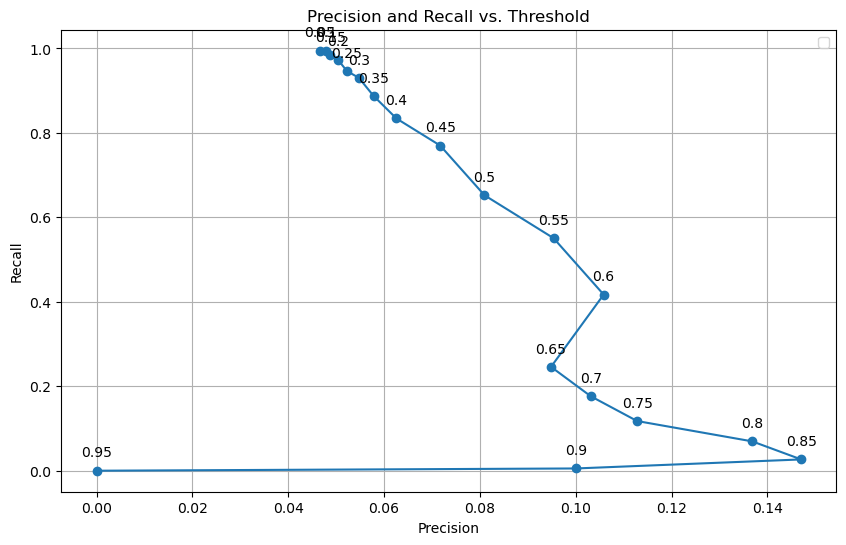

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Annotate every point using threshold_list values
for i, txt in enumerate(threshold_list):
    plt.annotate(f'{txt}', (precision_list[i], recall_list[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()